In [187]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import plot as pltfn
import admin_functions as adfn
from scipy import stats 

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload
 
# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


## PLOT1
### How do parameter combinations effect power law distributions 

* alter: firing probability and avalanche neighbour binning
* try altering neighbour binning and noise (varC/varB)
* measure: exponent and log likelihood 

In [3]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
g_p_l = sorted(glob.glob('*sizeparamsweepgroupp_log*'))
g_tp0_l = sorted(glob.glob('*sizeparamsweepgrouptp0_log*'))
g_tp3_l = sorted(glob.glob('*sizeparamsweepgrouptp3_log*'))
g_p_e = sorted(glob.glob('*sizeparamsweepgroupp_exp*'))
g_p_lpos = sorted(glob.glob('*sizeparamsweepgroupp_log+*'))
g_p_lpos

['sizeparamsweepgroupp_log+.npy']

In [ ]:
shape = 320
avlist = list(range(shape))
nums = adfn.name(F10t, experiment, 2, 12)
for t in nums:
    itav = sorted(glob.glob('*E-' + str(t) + '*nnbav.npy*')) 
    for i in range(len(itav)): 
        avlist[i] = powerfit(Fdrop, experiment, np.load(itav[i])[0])
    np.save(Fdrop + 'Project/' + experiment + os.sep + itav[i][:itav[i].find('run')+6] + 'sizeparamsweepp_log', avlist)
    print('Done fish num ' + str(f))     

## Plot parameter sweep

### Exponent
* fit to each fish individually - then take average 
* perform unbiased sweep across "reasonable" parameter values - e.g. minimise variance = 0.23nnb, 0.610 bin
* BCL - threshold - provide actual model values (explain in legend)
* percentile of closest cells

In [4]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
coordli = sorted(glob.glob('*BLN*realcoord.npy*')) 
sparli = sorted(glob.glob('*sizeparamsweeptp3_log*')) 
dparli = sorted(glob.glob('*durparam*1*'))
avli = sorted(glob.glob('*0.550bin0.10nnbav*'))

In [ ]:
#Minimum deviation from 2
from sklearn.metrics import mean_squared_error
import heapq

shape = np.load(sparli[0]).shape[0]
expsum = np.zeros((len(sparli),shape))
error = np.full((shape), 1000.0)
extrue = np.full((11), 2.0)
for i in range(shape):
    for t in range(len(sparli)):
        expsum[t,i] = np.load(sparli[t])[i,2]
    if np.isnan(np.sum(expsum)) == False:
        error[i] = mean_squared_error(extrue,expsum[:,i])
        
loc1 = np.where(error == heapq.nsmallest(1, error)[-1]) #smallest
loc2 = np.where(error == heapq.nsmallest(8, error)[-1]) #second smallest

In [109]:
#Minimum variance
from sklearn.metrics import mean_squared_error
import heapq

shape = (20*8)
expsum = np.zeros((len(sparli),shape))
var = np.full((shape), 1000.0)

for i in range(shape):
    for t in range(len(sparli)):
        expsum[t,i] = np.load(sparli[t])[:newshape][i,2]
    if np.isnan(np.sum(expsum)) == False:
        var[i] = np.var(expsum[:,i])
        
loc1 = np.where(var == heapq.nsmallest(1, var)[-1]) #smallest
loc2 = np.where(var == heapq.nsmallest(2, var)[-1]) #smallest
loc3 = np.where(var == heapq.nsmallest(3, var)[-1]) #smallest

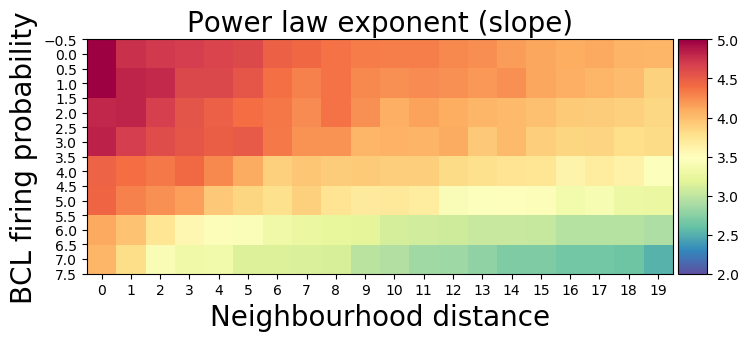

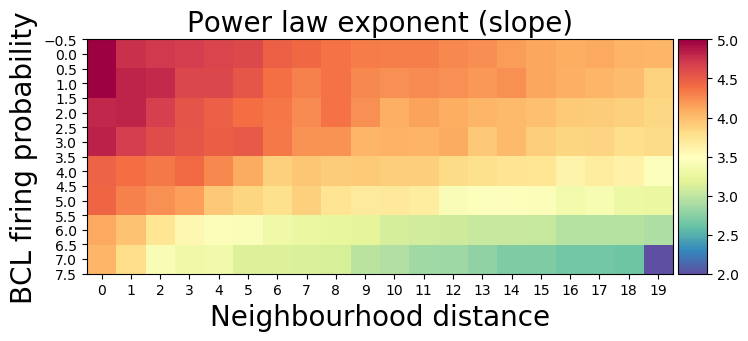

In [110]:
#MINIMISE VARIANCE IN PARAMETERS - WITH SENSIBLE P-FIRING RANGE (0.470-0.610)
#-----------------------------------------------------------------------------
shape = (20*8)
expsum = np.zeros((shape))
for i in range(shape):
    evec = []
    for t in range(len(sparli)):
        evec = np.append(evec, np.load(sparli[t])[:newshape][i,2])
    evec[np.where(np.isnan(evec) == True)[0]] = 0
    if np.sum(evec == 0) > 0: expsum[i] = np.sum(evec)/(len(evec) - np.sum(evec == 0)) 
    else: expsum[i] = np.sum(evec)/len(evec)

from mpl_toolkits.axes_grid1 import make_axes_locatable
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(expsum.shape[0]/nnbs)
expav = expsum.reshape((bcls,nnbs))    
plot1 = ax.imshow(expav, cmap = 'Spectral_r', vmin = 2, vmax = 5)
ax.set_title('Power law exponent (slope)', size = '20')
ax.set_xlabel('Neighbourhood distance', size = '20')
ax.set_ylabel('BCL firing probability', size = '20')
ax.locator_params(axis='y', nbins=21)
ax.locator_params(axis='x', nbins=20)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)
plt.show()

from mpl_toolkits.axes_grid1 import make_axes_locatable
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
expsum[loc1] = 2.0
bcls = np.int(expsum.shape[0]/nnbs)
expav = expsum.reshape((bcls,nnbs))    
plot1 = ax.imshow(expav, cmap = 'Spectral_r', vmin = 2, vmax = 5)
ax.set_title('Power law exponent (slope)', size = '20')
ax.set_xlabel('Neighbourhood distance', size = '20')
ax.set_ylabel('BCL firing probability', size = '20')
ax.locator_params(axis='y', nbins=21)
ax.locator_params(axis='x', nbins=20)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)
plt.show()

* recalculate on non-truncated power law - or always truncated?

/Users/dominicburrows/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


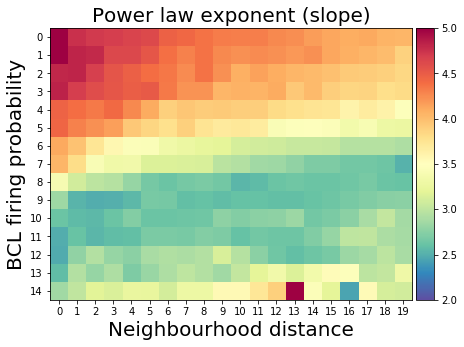

In [9]:
#MINIMISE VARIANCE IN PARAMETERS - WITH SENSIBLE P-FIRING RANGE (0.470-0.610)
#-----------------------------------------------------------------------------
shape = (320)
expsum = np.zeros((shape))
for i in range(shape):
    evec = []
    for t in range(len(sparli)):
        evec = np.append(evec, np.load(sparli[t])[i,2])
    evec[np.where(np.isnan(evec) == True)[0]] = 0
    if np.sum(evec == 0) > 0: expsum[i] = np.sum(evec)/(len(evec) - np.sum(evec == 0)) 
    else: expsum[i] = np.sum(evec)/len(evec)

from mpl_toolkits.axes_grid1 import make_axes_locatable
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(expsum.shape[0]/nnbs)
expav = expsum.reshape((bcls,nnbs))    
plot1 = ax.imshow(expav[:15,:], cmap = 'Spectral_r', vmin = 2, vmax = 5)
ax.set_title('Power law exponent (slope)', size = '20')
ax.set_xlabel('Neighbourhood distance', size = '20')
ax.set_ylabel('BCL firing probability', size = '20')
ax.locator_params(axis='y', nbins=21)
ax.locator_params(axis='x', nbins=20)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)
plt.show()

#### Loglikelihood (marginal) map
* calculate individual log (or marginal) likelihood values for each fish - average for map
#### OR
* loglik ratio - loglike power law vs lognormal - average likelihood then take log of their ratio

In [ ]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
tp3_log = sorted(glob.glob('*sizeparam*tp3_log*')) 
tp3_exp = sorted(glob.glob('*sizeparam*tp3_exp*')) 
tp0_log = sorted(glob.glob('*sizeparam*tp0_log*')) 
p_log = sorted(glob.glob('sizeparam*p_log*')) 
p_exp = sorted(glob.glob('*sizeparam*p_exp*'))
p_log

In [ ]:
#powerlaw vs lognorm
#-----------------------------------
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, axarr = plt.subplots(figsize = (7,14))
prac = np.load(g_p_lpos[0])[:,0]
nnbs = 20
bcls = np.int(prac.shape[0]/nnbs)
prac1 = prac.reshape((bcls,nnbs))    
plot1 = axarr.imshow(prac1, cmap = 'Spectral_r', vmin = -2, vmax = 2)
axarr.set_title('Loglik ratio (Power law vs Lognormal+)', size = '20')
axarr.set_xlabel('Neighbourhood distance', size = '20')
axarr.set_ylabel('BCL firing probability', size = '20')
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)   
os.chdir(Ffig)
plt.savefig('powerlawlognorm+_matrix.png')
plt.show()

In [ ]:
#powerlaw vs lognorm
#-----------------------------------
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, axarr = plt.subplots(figsize = (7,14))
prac = np.load(p_log[0])[:,0]
nnbs = 20
bcls = np.int(prac.shape[0]/nnbs)
prac1 = prac.reshape((bcls,nnbs))    
plot1 = axarr.imshow(prac1, cmap = 'Spectral_r', vmin = -2, vmax = 2)
axarr.set_title('Loglik ratio (Power law vs Lognormal)', size = '20')
axarr.set_xlabel('Neighbourhood distance', size = '20')
axarr.set_ylabel('BCL firing probability', size = '20')
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)   
os.chdir(Ffig)
plt.savefig('powerlaw_matrix.png')
plt.show()

In [ ]:
#powerlaw vs exponent
#-----------------------------------------
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, axarr = plt.subplots(figsize = (5,9))
prac = np.load(p_exp[0])[:,0]
nnbs = 20
bcls = np.int(prac.shape[0]/nnbs)
prac1 = prac.reshape((bcls,nnbs))    
plot1 = axarr.imshow(prac1, cmap = 'Spectral_r', vmin = -2, vmax = 2)
axarr.set_title('Loglik ratio (Power law vs Exponential)', size = '15')
axarr.set_xlabel('Neighbourhood distance', size = '20')
axarr.set_ylabel('BCL firing probability', size = '20') 
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)    
os.chdir(Ffig)
plt.savefig('powerlawexp_matrix.png')
plt.show()

## PLOT2
### AVALANCHE SIZE, DURATION AND SIZE VS DURATION
* use pdf 
* Plot average distribution (concatenated, sd shading), and null distribution (concatenated, sd shading) - alongside null with CI
* Show each baseline, with its null (CIs?)
* Show all baselines plotted together

In [193]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_0.59*0.10*av.npy*'))
p5list = sorted(glob.glob('*PTZ05*_0.59*0.10*av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_0.59*0.10*av.npy*'))
p5list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_0.590bin0.10nnbav.npy']

In [228]:
#==============================
def list_of_list(lengths): #expects a list of lists
#===============================
    listoflist = []
    for i in range(len(lengths)):
        listoflist = [listoflist for i in range(lengths[i] + 1)]
    return(listoflist)

In [231]:
list_of_list([10, 20, 3])

[[[[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [

In [223]:
prac = [10,20]
len(prac)

2

In [224]:
avlist = [[] for i in range(11)]
fishlist = [avlist for i in range(20)]
fishlist

[[[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], []]]

In [227]:
avlist = [[] for i in range(11)]
avlist = [avlist for i in range(20)]
avlist = [avlist for i in range(30)]
avlist

[[[[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []],
  [[], [], [], [], [], [], [], [], [], [], []]],
 [[[], [], [], [], [], [], [], [], [], 

In [195]:
num = adfn.name_zero('front', 2,12, 1)
avlist = list((range(20, list(range(11))))
for i in num:
    num1 = adfn.name_zero('back', 0.04, 0.23, 0.01)
    for e in num1:
        blnlist = sorted(glob.glob('*' + str(i) + '*BLN*_0.59*'+ str(e) + '*av.npy*'))
        avlist = 

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10


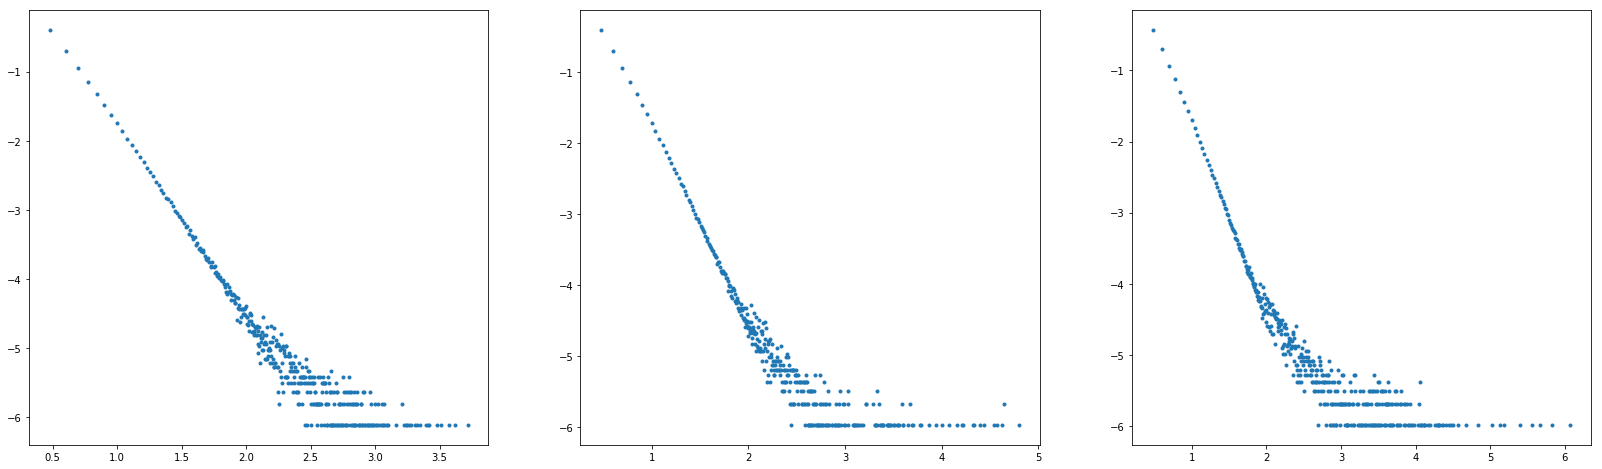

In [83]:
# 0.59 bcl - 0.10 nnb
blnc,p5c, p20c = [],[],[]
for i in range(len(blnlist2)):
    blnc, p5c, p20c = np.append(blnc,np.load(blnlist3[i])[0]), np.append(p5c, np.load(p5list3[i])[0]), np.append(p20c, np.load(p20list3[i])[0])
    
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
fig, axarr = plt.subplots(1,3, figsize = (28,8))
for i in range(1):
    avdistcut = blnc
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr[i].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 3)
    avdistcut = p5c
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr[i+1].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 3)
    avdistcut = p20c
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr[i+2].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 3)

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10


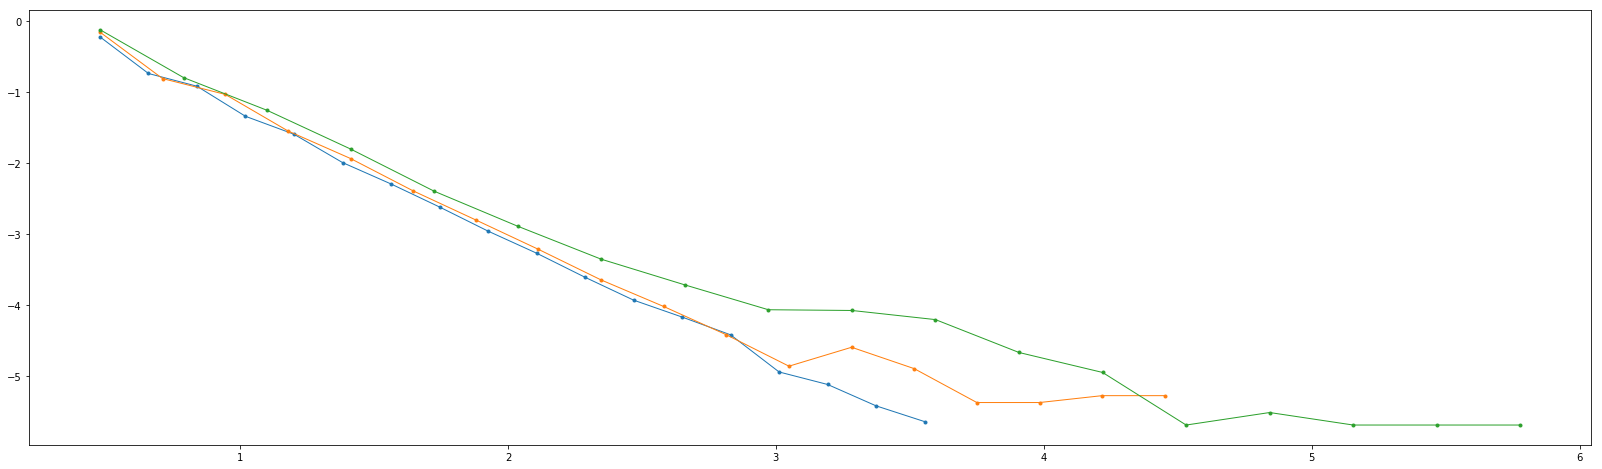

In [85]:
# 0.57 bcl - 0.10 nnb
blnc,p5c, p20c = [],[],[]
for i in range(len(blnlist2)):
    blnc, p5c, p20c = np.append(blnc,np.load(blnlist3[i])[0]), np.append(p5c, np.load(p5list3[i])[0]), np.append(p20c, np.load(p20list3[i])[0])
    
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
fig, axarr = plt.subplots(figsize = (28,8))
for i in range(1):
    avdistcut = blnc
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 20)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-o', linewidth = 1, markersize = 3)
    avdistcut = p5c
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 20)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-o', linewidth = 1, markersize = 3)
    avdistcut = p20c
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 20)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-o', linewidth = 1, markersize = 3)

In [86]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
binlist = sorted(glob.glob('*0.610binarised*npy*')) #iterated list - binarised trace 
blnlist = sorted(glob.glob('*BLN*_0.61*23*av*npy*'))
p5list = sorted(glob.glob('*PTZ05*_0.61*23*av*npy*'))
p20list = sorted(glob.glob('*PTZ20*_0.61*23*av*npy*'))
p20list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01__0.610bin0.23nnbav.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01__0.610bin0.23nnbav.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.610bin0.23nnbav.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.610bin0.23nnbav.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_0.610bin0.23nnbav.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.610bin0.23nnbav.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_0.610bin0.23nnbav.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_0.610bin0.23nnbav.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_0.610bin0.23nnbav.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_0.610bin0.23nnbav.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_0.610bin0.23nnbav.npy']

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10


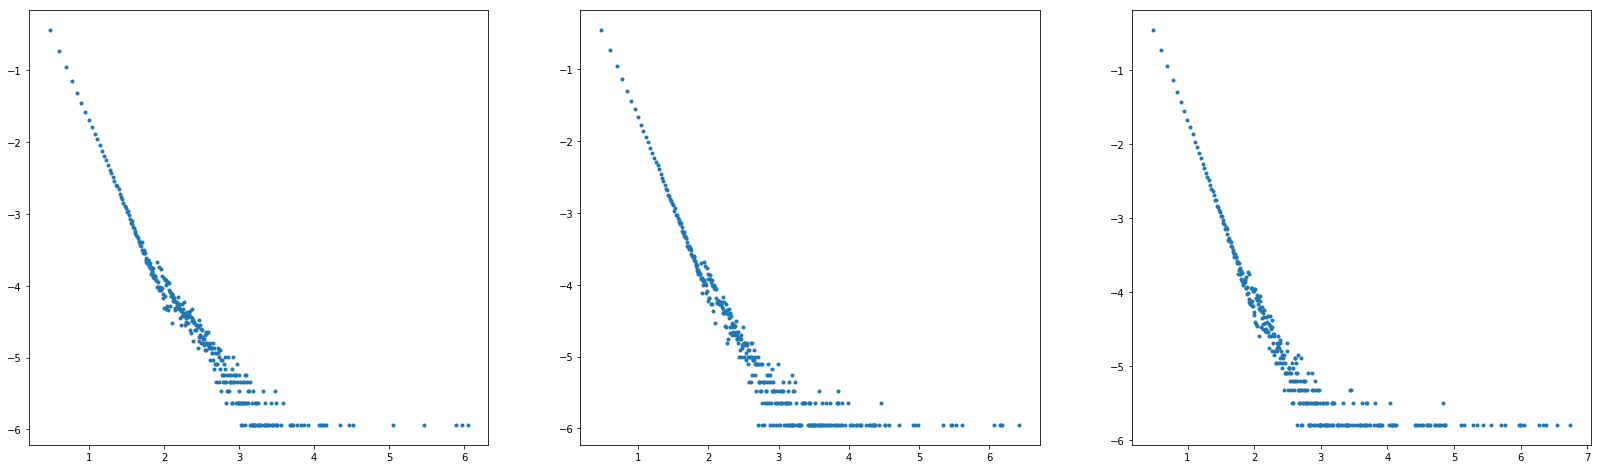

In [88]:
# 0.610 bcl - 0.23 nnb
blnc,p5c, p20c = [],[],[]
for i in range(len(blnlist)):
    blnc, p5c, p20c = np.append(blnc,np.load(blnlist[i])[0]), np.append(p5c, np.load(p5list[i])[0]), np.append(p20c, np.load(p20list[i])[0])
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
fig, axarr = plt.subplots(1,3, figsize = (28,8))
for i in range(1):
    avdistcut = blnc
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr[i].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 3)
    avdistcut = p5c
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr[i+1].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 3)
    avdistcut = p20c
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr[i+2].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 3)

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


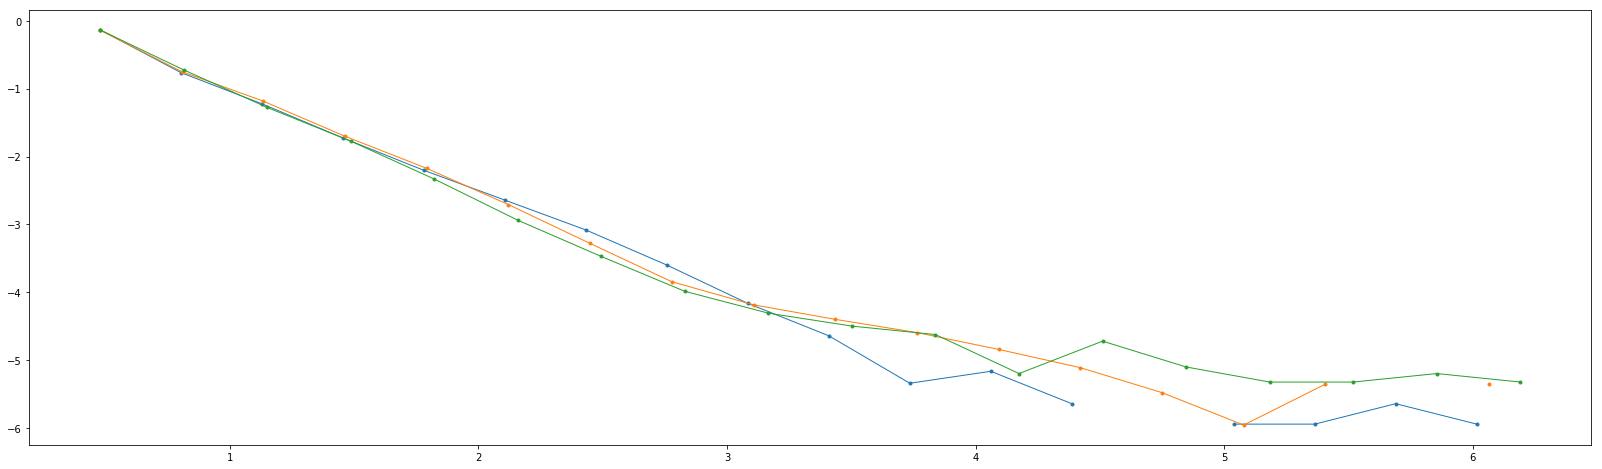

In [89]:
# 0.57 bcl - 0.10 nnb
blnc,p5c, p20c = [],[],[]
for i in range(len(blnlist)):
    blnc, p5c, p20c = np.append(blnc,np.load(blnlist[i])[0]), np.append(p5c, np.load(p5list[i])[0]), np.append(p20c, np.load(p20list[i])[0])
    
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
fig, axarr = plt.subplots(figsize = (28,8))
for i in range(1):
    avdistcut = blnc
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 20)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-o', linewidth = 1, markersize = 3)
    avdistcut = p5c
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 20)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-o', linewidth = 1, markersize = 3)
    avdistcut = p20c
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 20)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-o', linewidth = 1, markersize = 3)

/Users/dominicburrows/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


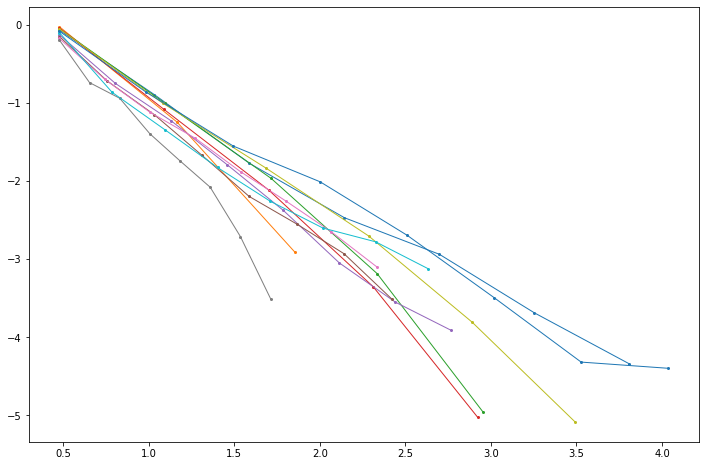

In [32]:
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
fig, axarr = plt.subplots(figsize = (12,8))
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 10)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-o', linewidth = 1, markersize = 2)

/Users/dominicburrows/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/dominicburrows/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


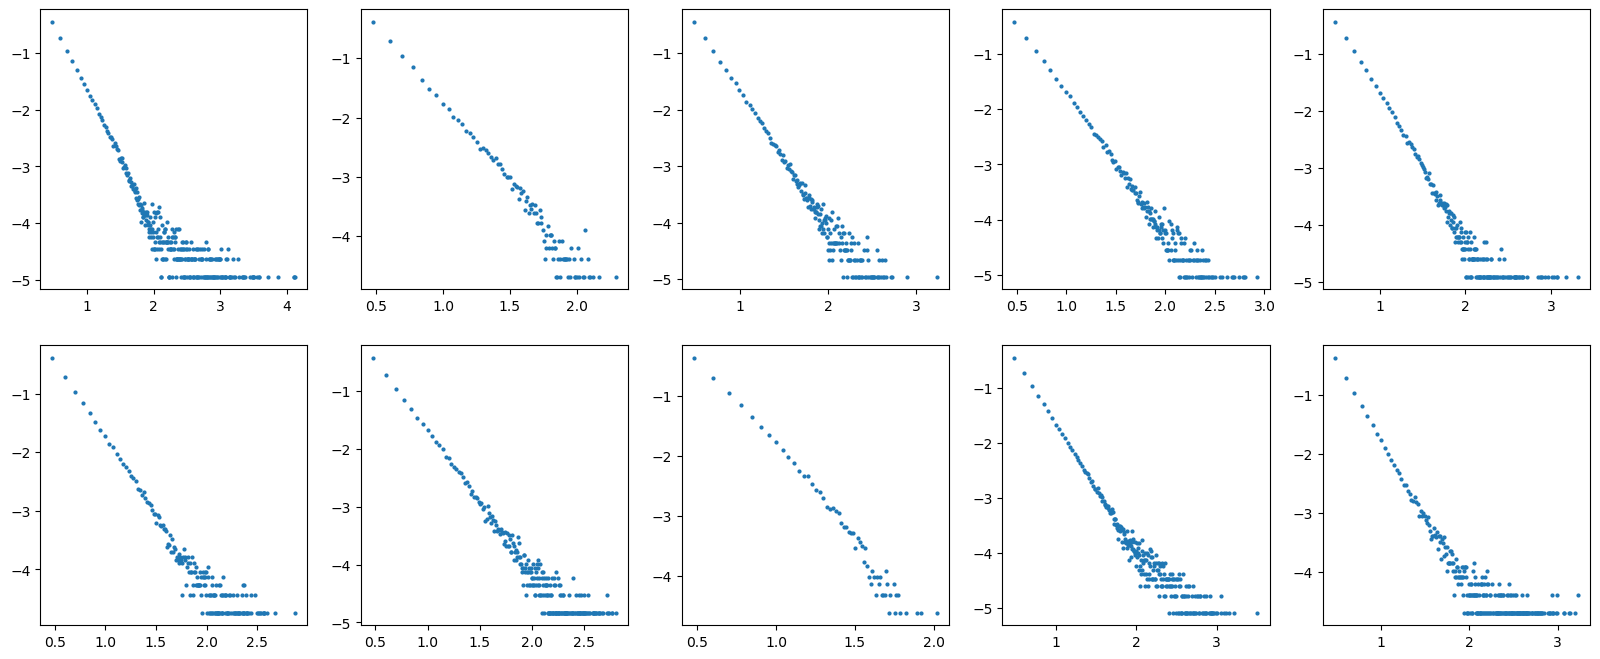

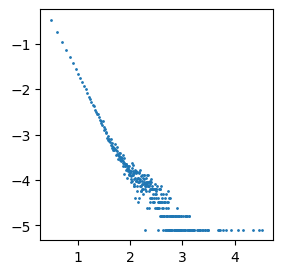

In [70]:
#PDF - SIZE VS DURATION
#----------------------
f, axarr = plt.subplots(2,5,figsize = (20,8))
yco = 0
xco = 0
for i in range(len(blnlist)-1):
    if i == 5:
        xco = 0
        yco = 1
    avdistcut = np.load(blnlist[i])[0]
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr[yco,xco].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth  = 4, markersize = 2)   
    xco+=1

f, ax = plt.subplots(figsize = (3,3))
i = 10
avsize = np.load(blnlist[i])[0]
sizevec = []
avdistcut = np.load(blnlist[i])[0]
mini = np.min(avdistcut)
maxi = np.max(avdistcut)
binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
hist = np.histogram(avdistcut, bins = binned)
xaxis = np.log10(hist[1][:-1])
yaxis = np.log10(hist[0]/np.sum(hist[0]))
ax.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth  = 2, markersize = 1)   

/Users/dominicburrows/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


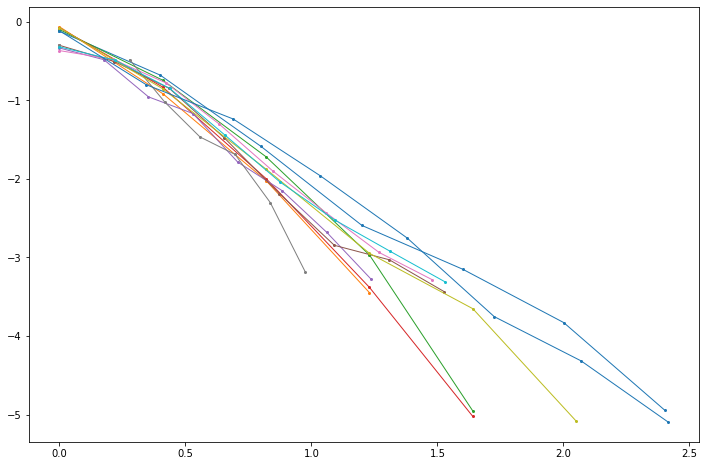

In [35]:
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
fig, axarr = plt.subplots(figsize = (12,8))
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[1]
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 10)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-o', linewidth = 1, markersize = 2)

/Users/dominicburrows/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/dominicburrows/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


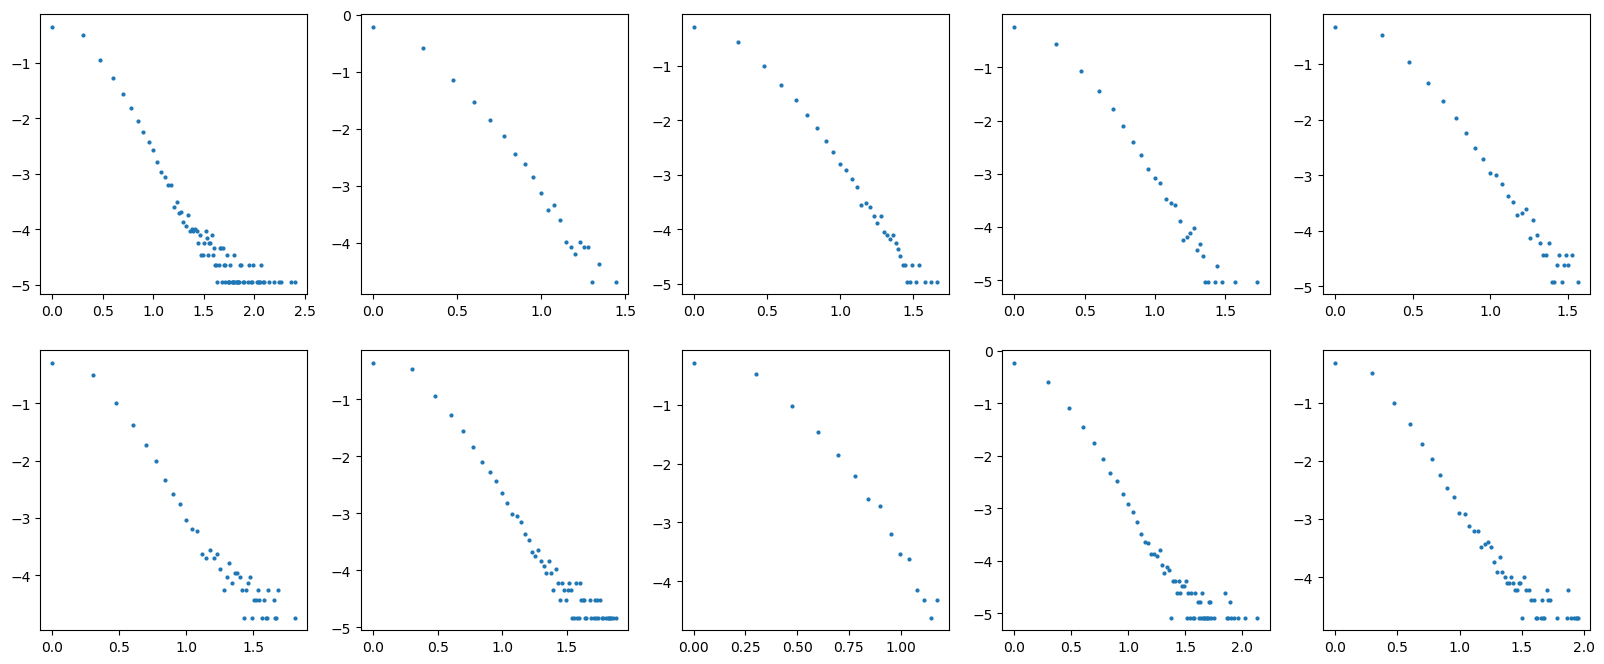

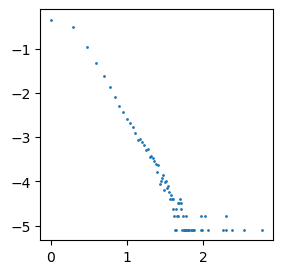

In [68]:
#PDF - SIZE VS DURATION
#----------------------
f, axarr = plt.subplots(2,5,figsize = (20,8))
yco = 0
xco = 0
for i in range(len(blnlist)-1):
    if i == 5:
        xco = 0
        yco = 1
    avdistcut = np.load(blnlist[i])[1]
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr[yco,xco].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth  = 4, markersize = 2)   
    xco+=1

f, ax = plt.subplots(figsize = (3,3))
i = 10
avsize = np.load(blnlist[i])[0]
sizevec = []
avdistcut = np.load(blnlist[i])[1]
mini = np.min(avdistcut)
maxi = np.max(avdistcut)
binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
hist = np.histogram(avdistcut, bins = binned)
xaxis = np.log10(hist[1][:-1])
yaxis = np.log10(hist[0]/np.sum(hist[0]))
ax.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth  = 2, markersize = 1)   

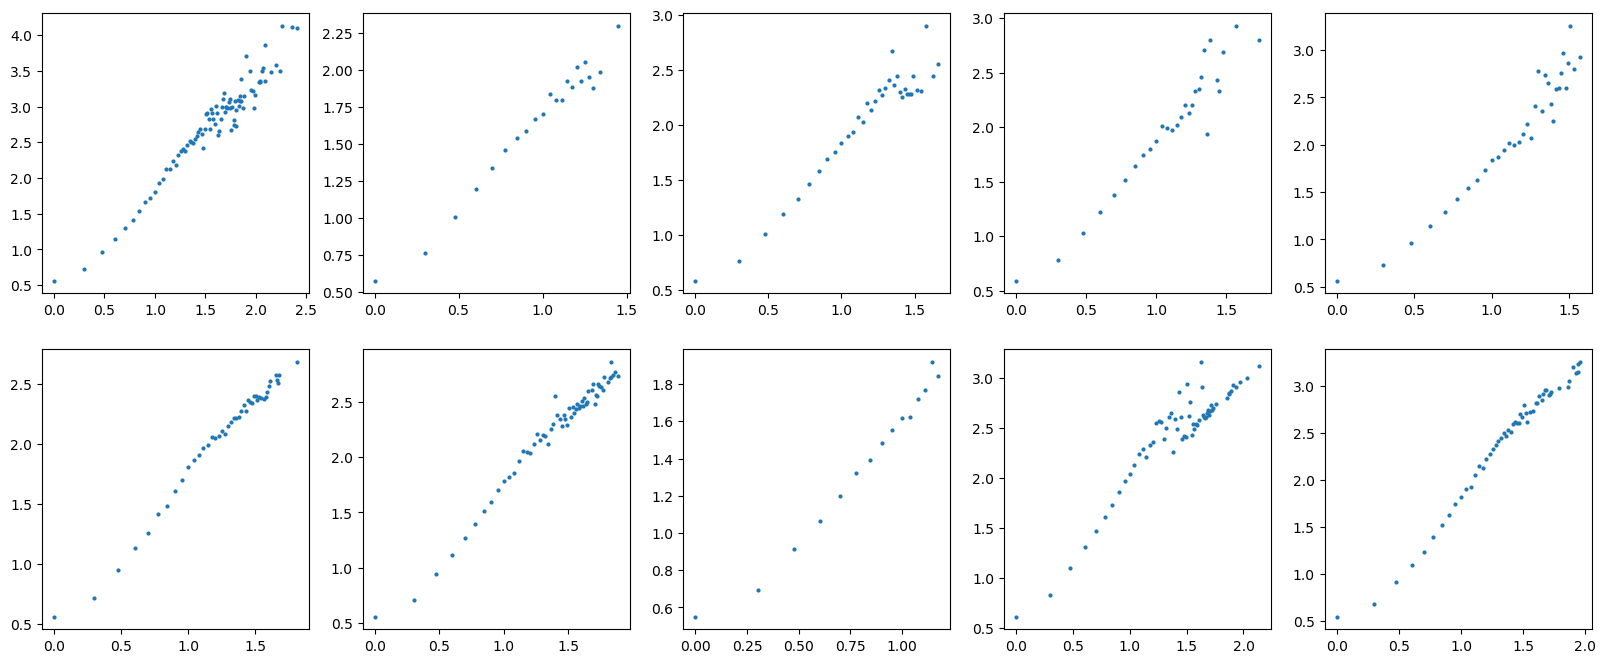

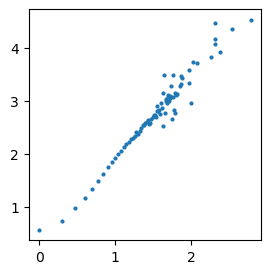

In [63]:
#PDF - SIZE VS DURATION
#----------------------
f, axarr = plt.subplots(2,5,figsize = (20,8))
yco = 0
xco = 0
for e in range(len(blnlist)-1):
    if e == 5:
        xco = 0
        yco = 1
    avsize = np.load(blnlist[e])[0]
    avdur = np.load(blnlist[e])[1]
    sizevec = []
    for i in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == i)]))    
    xaxis = np.log10(np.unique(avdur))
    yaxis = np.log10(sizevec)
    axarr[yco,xco].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 2)
    xco+=1

f, ax = plt.subplots(figsize = (3,3))
e = 10
avsize = np.load(blnlist[e])[0]
avdur = np.load(blnlist[e])[1]
sizevec = []
for i in np.unique(avdur):
    sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == i)]))    
xaxis = np.log10(np.unique(avdur))
yaxis = np.log10(sizevec)
plt.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 2)

## PLOT3
* Power law quantification (vs lognormal, exponential)
* exponent
* branching ratio

In [71]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
branchlist = sorted(glob.glob('*branch*'))


In [182]:
%load_ext autoreload
%autoreload
powlist = list(range(len(blnlist)))
for t in range(len(blnlist)):
    powlist[t] = crfn.powerfit(Fdrop, experiment, np.load(blnlist[t])[0], 3)  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [158]:
%load_ext autoreload
%autoreload
powlist = list(range(len(blnlist)))
for t in range(len(blnlist)):
    powlist[t] = crfn.powerfit(Fdrop, experiment, np.load(blnlist[t])[1], 3)  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [181]:
powlist[9]

array([ 0.16101145,  0.87208438,  2.96463942,  0.10670457, 33.        ])

In [ ]:
%load_ext autoreload
%autoreload
pow1list = list(range(len(blnlist)))
for t in range(len(blnlist)):
    pow1list[t] = crfn.powerfit(Fdrop, experiment, np.load(p20list[t])[0], 3)  

In [145]:
pow1list[9]

array([6.51500567e+00, 7.26869123e-11, 2.36383145e+00, 1.19874401e-02,
       1.96000000e+02])

,Baseline,PTZ 5mM,PTZ 20mM
0,1.0754216695929109,1.0786627607587,1.0349581558755467
1,1.0569741767018006,1.0009176782890827,1.0006118871953922
2,1.0915308722290362,1.0627813414604608,0.9967352355133188
3,1.0954195731990781,1.1277662067755598,1.0525472969143903
4,1.056071553338612,1.0938333079572178,1.10934784315113
5,1.0275302970878732,1.1026190732893877,1.0361069925023225
6,1.0507362084977545,1.1104530973052478,1.0099047170705249
7,0.9596875123085207,1.01952637420914,1.0533074112892524
8,1.1621694369325957,1.1454951293288471,1.0067189613345806
9,1.011398086434399,1.0865172172822364,1.0469875582110366


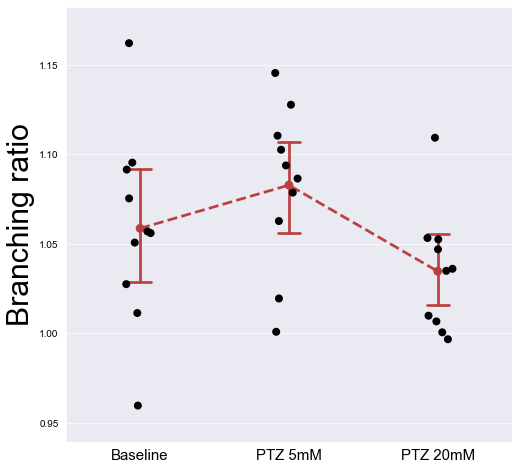

In [59]:
pltfn.boxplot(Fdrop, experiment, branchlist, 'Branching ratio')

In [ ]:
#CALCULATE BRANCHING RATIO
import numpy as np
import os
    
branchlist = list(range(len(pkglist)))
    
for y in range(len(pkglist)):
    pkg = np.load(pkglist[y])[3000:4000]
    brancharr = np.zeros((np.int(np.max(pkg)), np.max(np.load(avlist[y])[1])))
    #brancharr = np.zeros((np.load(avlist[y])[1].shape[0], np.max(np.load(avlist[y])[1]))) #empty array of size: number of avalanches x max number of frames
    #indexlist = np.unique(pkg)[np.where(np.unique(pkg,return_counts = True)[1][1:] >=3)[0]] #list of all avalanche marker values >=3, ordered - index can be used for filling brancharr in order
    i = 0
        
    for t in range(pkg.shape[1]): #loop through all time points
        if t == pkg.shape[1]-1:
            break
        n1 = np.unique(pkg[:,t])  #unique marker values at each time point
        n2 = np.unique(pkg[:,t+1]) 
        nx = np.intersect1d(n1, n2) #marker values that continue to next time frame
    
        if i% round(10*pkg.shape[1]/100) == 0: print('doing time step ' + str(i) + ' of ' + str(pkg.shape[1]) + ' for fish ' + str(y))
        i = i+1

        for mark in nx[1:]: #loop through each marker value at this time point (only if marker active in next time point)
            mark = np.int(mark)
            ancestor = np.unique(pkg[:,t], return_counts = True)[1][np.where(np.unique(pkg[:,t], return_counts = True)[0] == mark)[0]][0] #number of cells in that avalanche for that marker value at time point t  
            descend = np.unique(pkg[:,t+1], return_counts = True)[1][np.where(np.unique(pkg[:,t+1], return_counts = True)[0] == mark)[0]][0] #same as above for next time point
            #index = np.where(indexlist == mark)[0] #find index in brancharr list
            brancharr[mark, np.where(brancharr[mark] == 0)[0][0]] = (descend/ancestor)
    branchlist[y] = np.mean(brancharr[np.where(brancharr > 0)])

### Supplementary figure
* show different distributions and different calcium traces for different p firing values

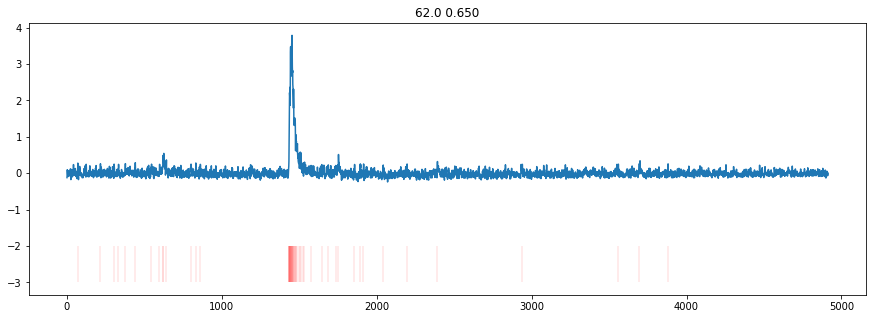

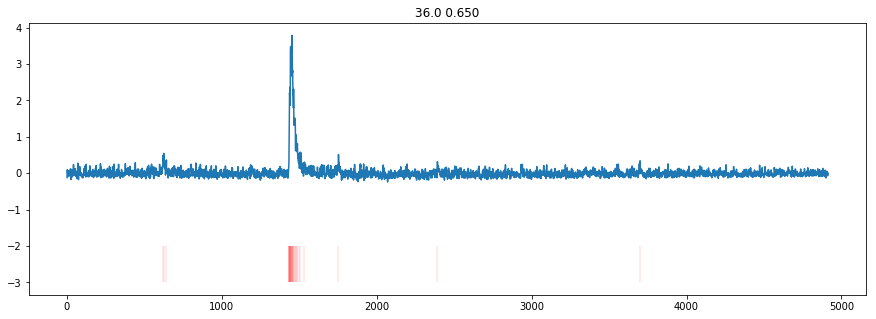

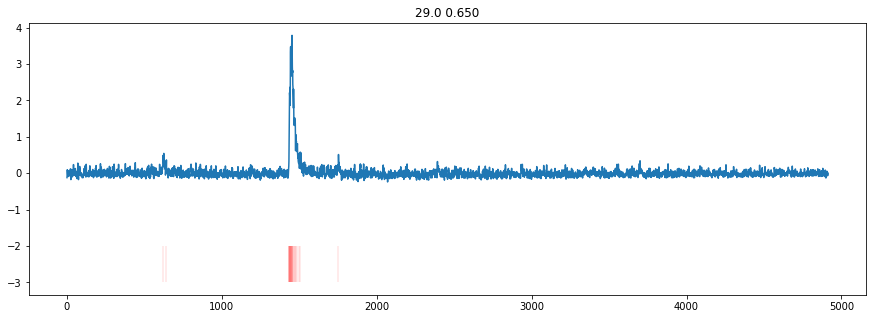

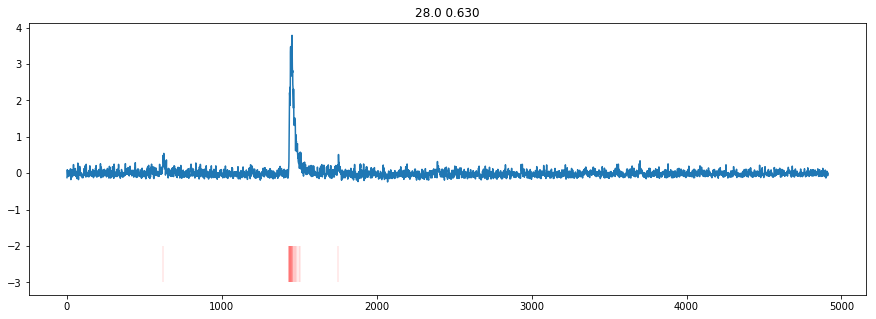

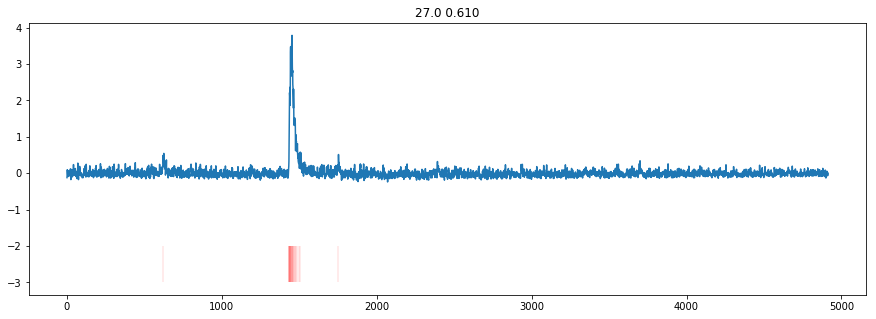

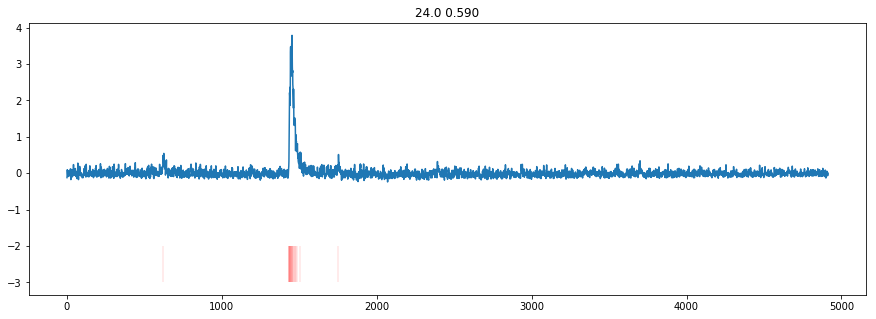

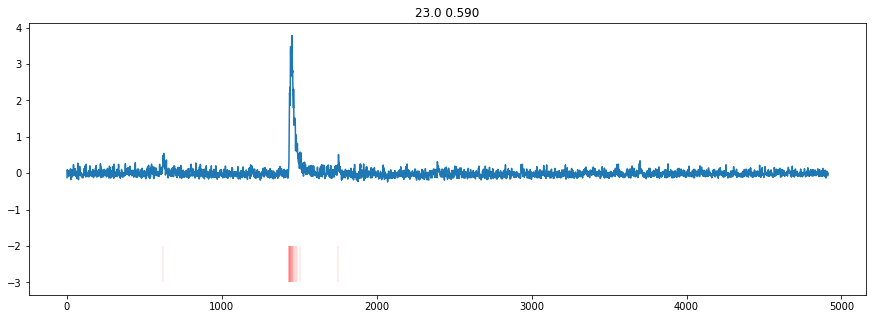

In [6]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
c = 3

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.690binarised.npy'))
callist = sorted(glob.glob('*BLN*0.690modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.650'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.670binarised.npy'))
callist = sorted(glob.glob('*BLN*0.670modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.650'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.650binarised.npy'))
callist = sorted(glob.glob('*BLN*0.650modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.650'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.630binarised.npy'))
callist = sorted(glob.glob('*BLN*0.630modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.630'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.610binarised.npy'))
callist = sorted(glob.glob('*BLN*0.610modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.610'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.590binarised.npy'))
callist = sorted(glob.glob('*BLN*0.590modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.590'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.570binarised.npy'))
callist = sorted(glob.glob('*BLN*0.570modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.590'))
plt.show()

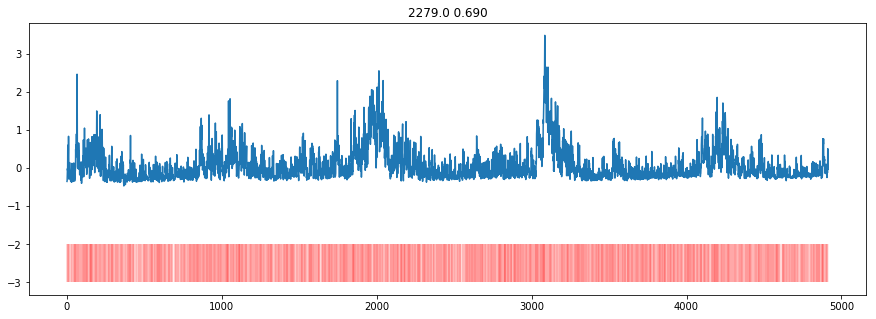

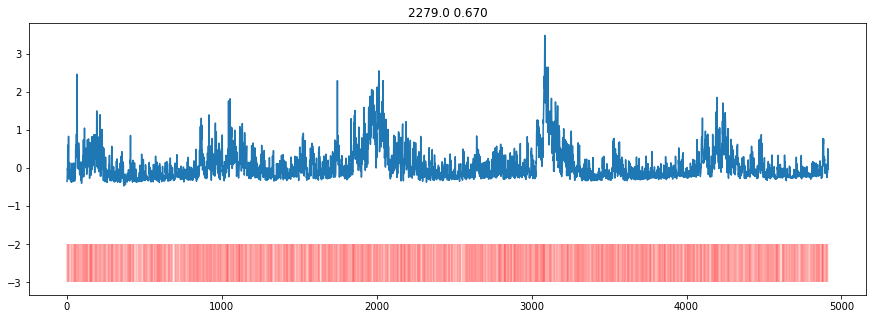

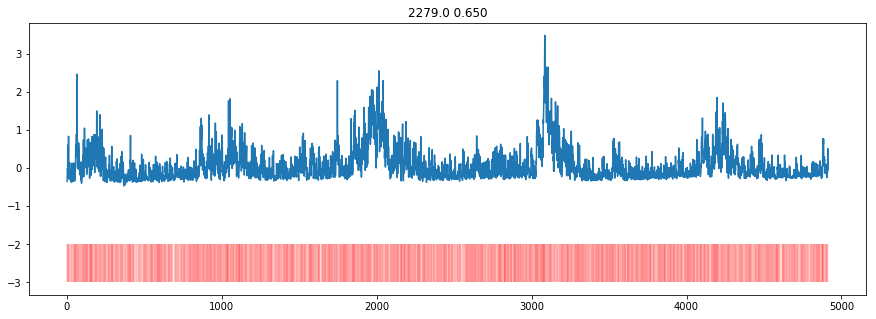

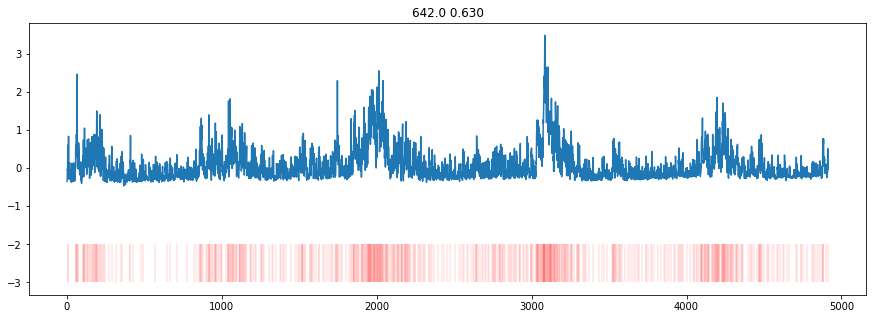

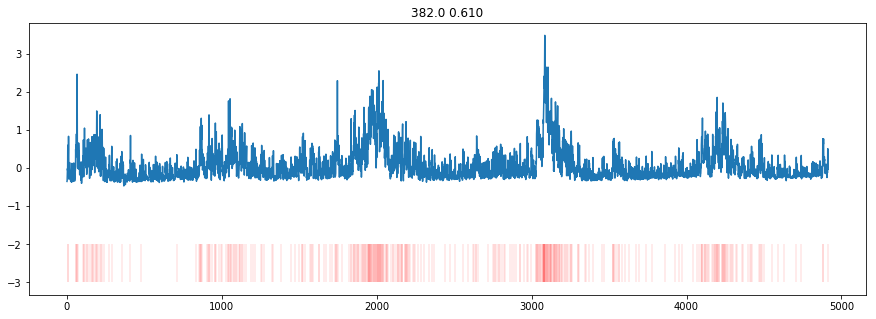

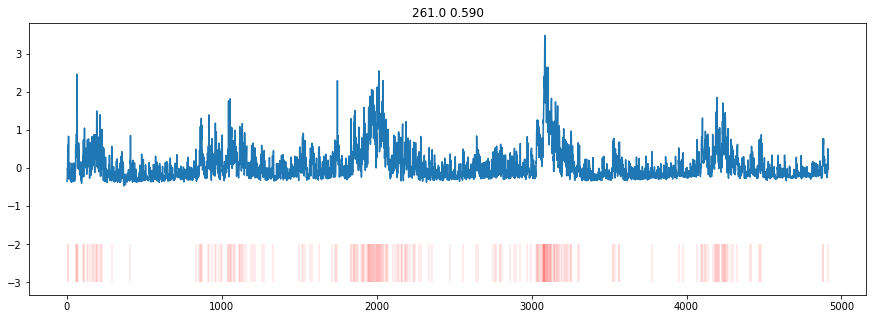

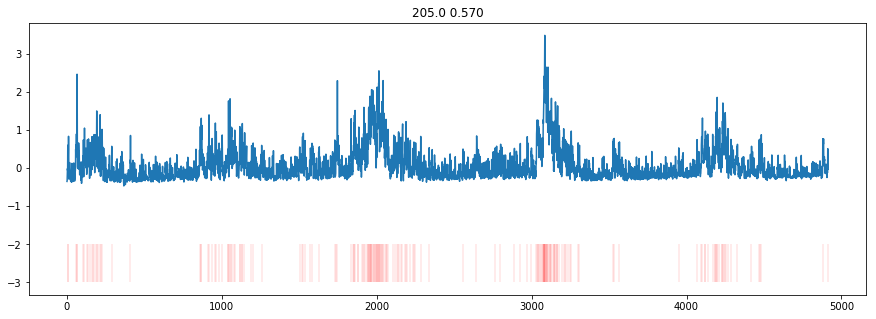

In [8]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
c = 30

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.690binarised.npy'))
callist = sorted(glob.glob('*BLN*0.690modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.690'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.670binarised.npy'))
callist = sorted(glob.glob('*BLN*0.670modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.670'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.650binarised.npy'))
callist = sorted(glob.glob('*BLN*0.650modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.650'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.630binarised.npy'))
callist = sorted(glob.glob('*BLN*0.630modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.630'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.610binarised.npy'))
callist = sorted(glob.glob('*BLN*0.610modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.610'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.590binarised.npy'))
callist = sorted(glob.glob('*BLN*0.590modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.590'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.570binarised.npy'))
callist = sorted(glob.glob('*BLN*0.570modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.570'))
plt.show()


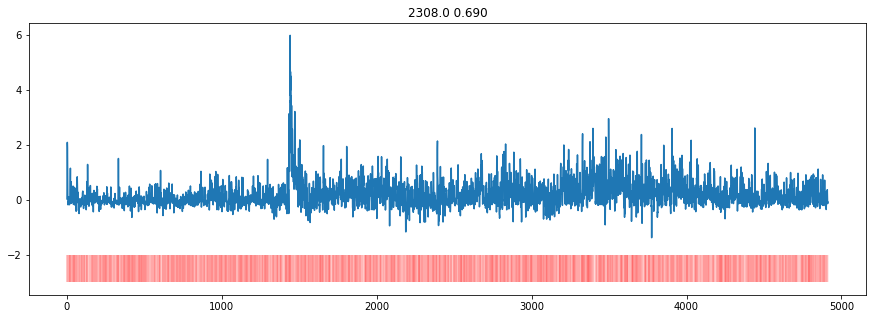

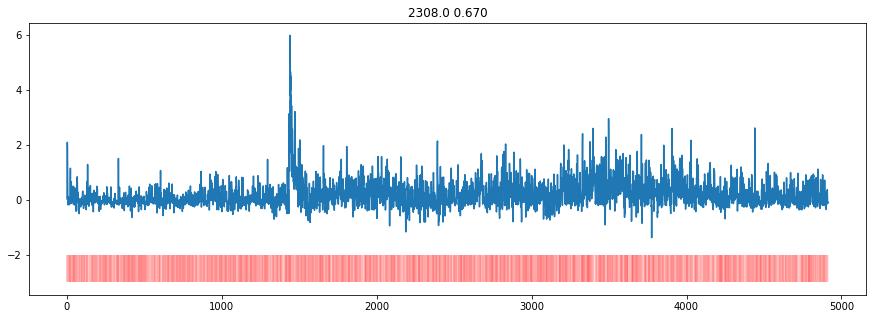

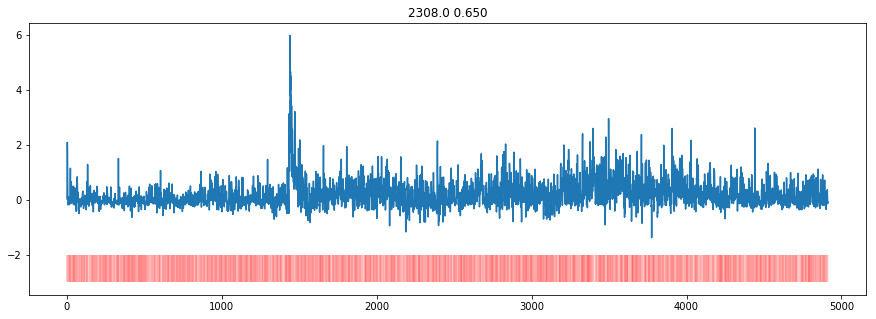

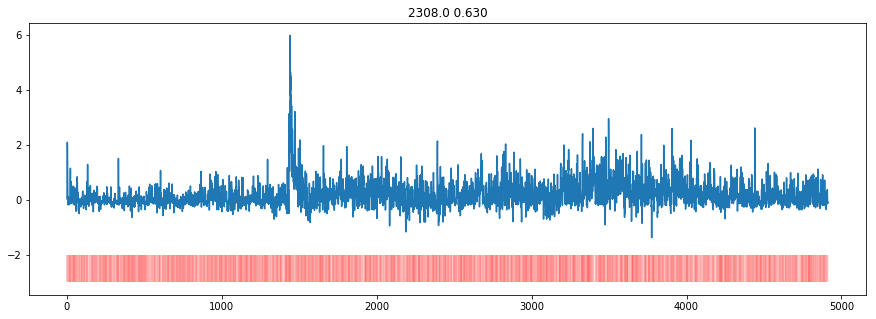

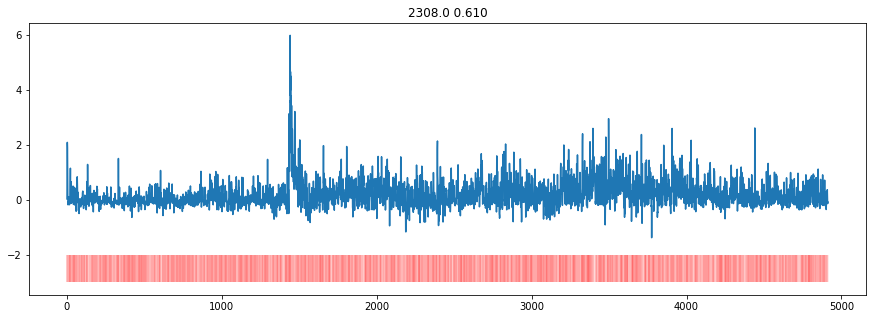

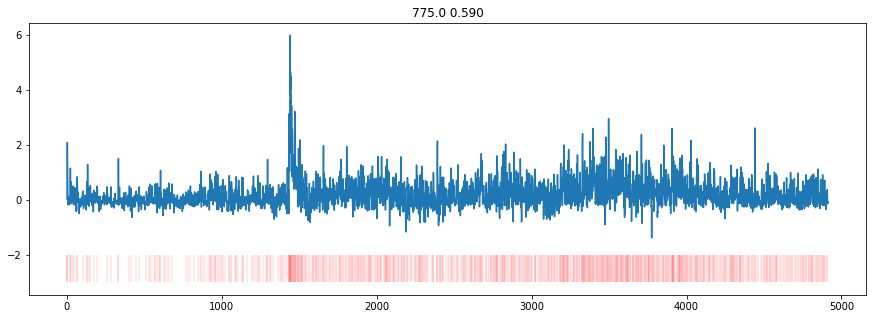

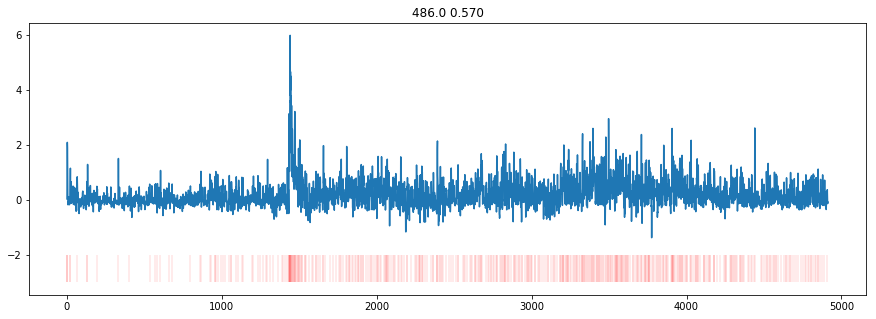

In [2]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
c = 43

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.690binarised.npy'))
callist = sorted(glob.glob('*BLN*0.690modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.690'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.670binarised.npy'))
callist = sorted(glob.glob('*BLN*0.670modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.670'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.650binarised.npy'))
callist = sorted(glob.glob('*BLN*0.650modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.650'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.630binarised.npy'))
callist = sorted(glob.glob('*BLN*0.630modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.630'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.610binarised.npy'))
callist = sorted(glob.glob('*BLN*0.610modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.610'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.590binarised.npy'))
callist = sorted(glob.glob('*BLN*0.590modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.590'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.570binarised.npy'))
callist = sorted(glob.glob('*BLN*0.570modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.570'))
plt.show()

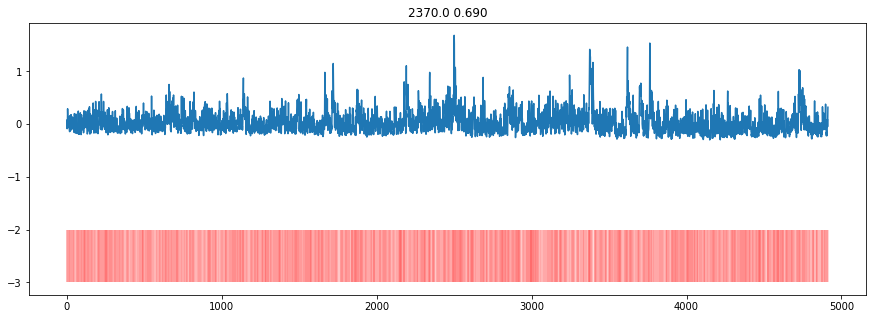

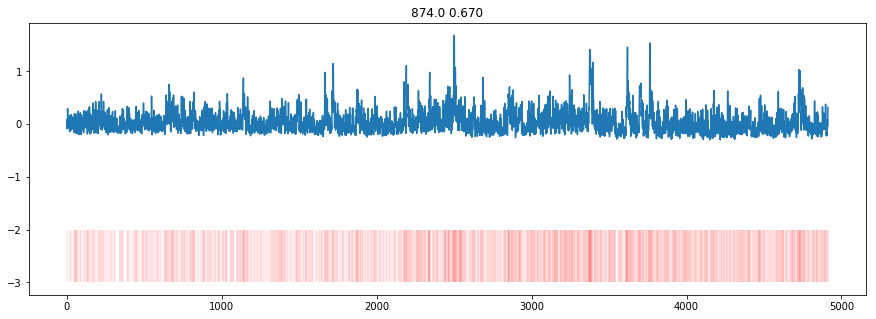

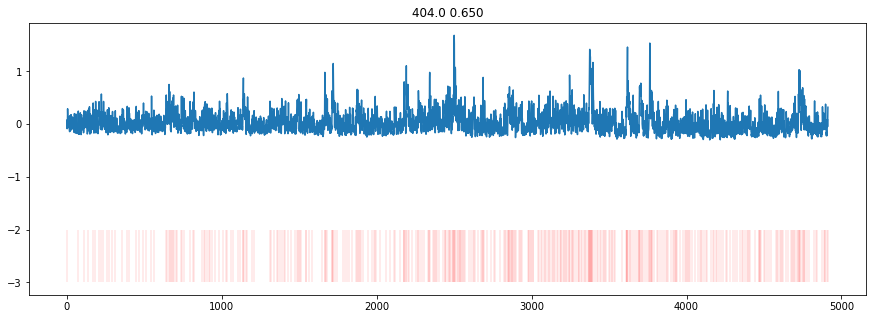

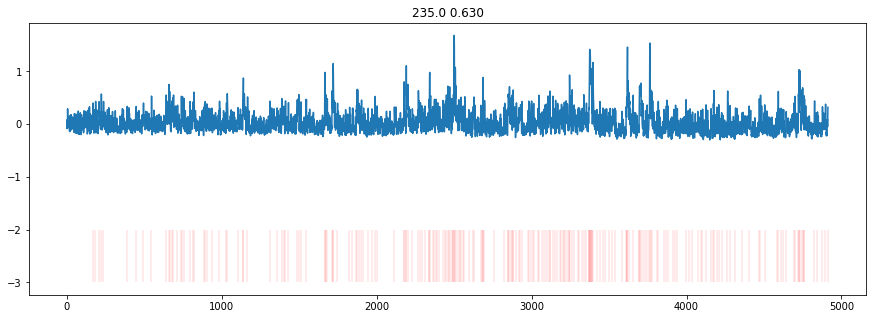

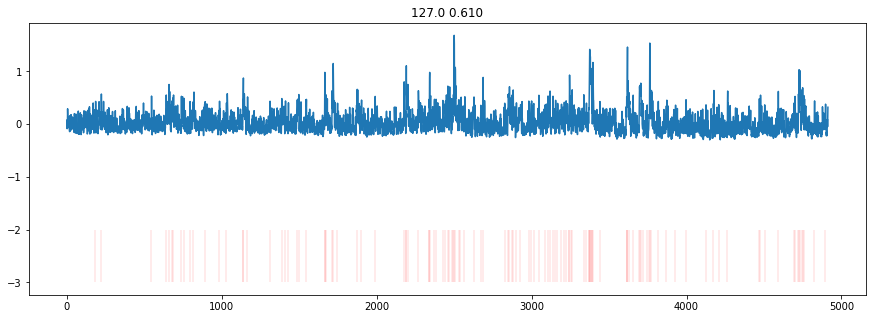

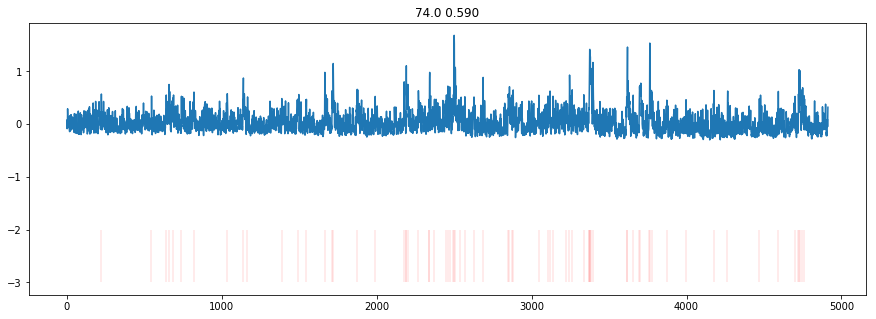

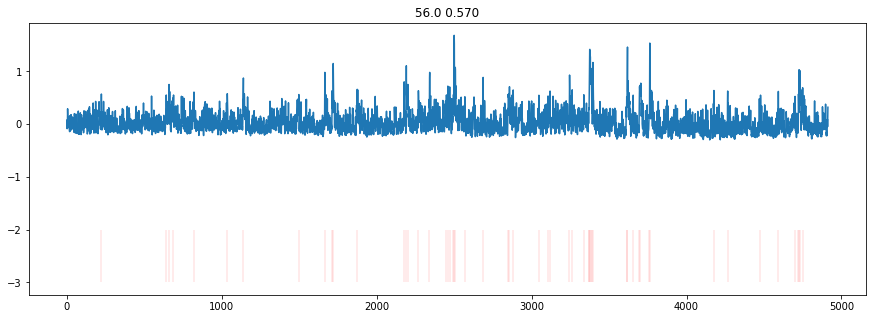

In [3]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
c = 143

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.690binarised.npy'))
callist = sorted(glob.glob('*BLN*0.690modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.690'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.670binarised.npy'))
callist = sorted(glob.glob('*BLN*0.670modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.670'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.650binarised.npy'))
callist = sorted(glob.glob('*BLN*0.650modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.650'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.630binarised.npy'))
callist = sorted(glob.glob('*BLN*0.630modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.630'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.610binarised.npy'))
callist = sorted(glob.glob('*BLN*0.610modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.610'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.590binarised.npy'))
callist = sorted(glob.glob('*BLN*0.590modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.590'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.570binarised.npy'))
callist = sorted(glob.glob('*BLN*0.570modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.570'))
plt.show()

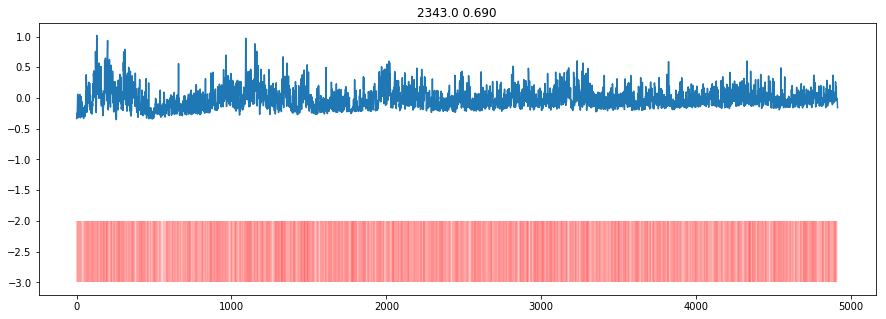

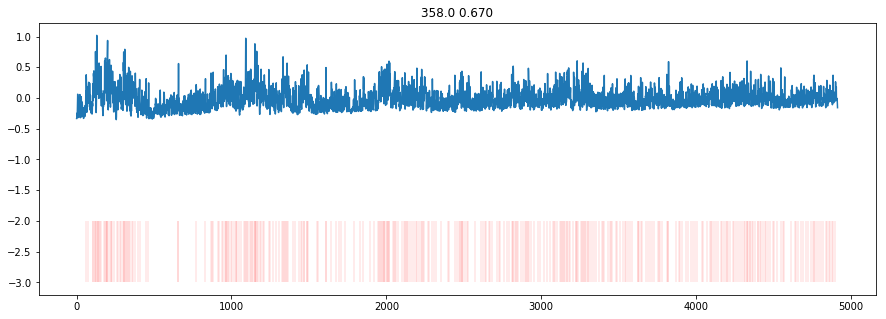

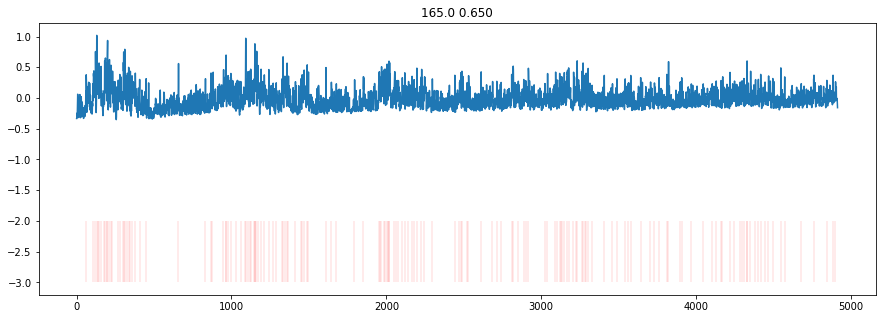

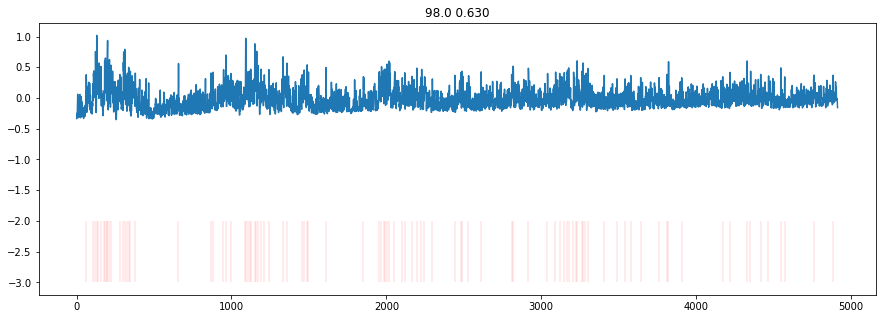

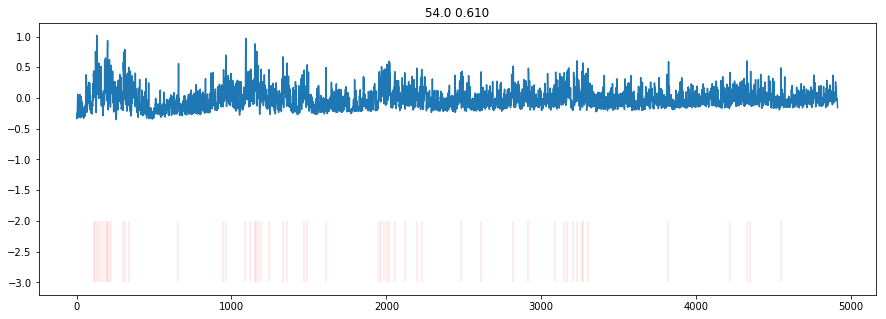

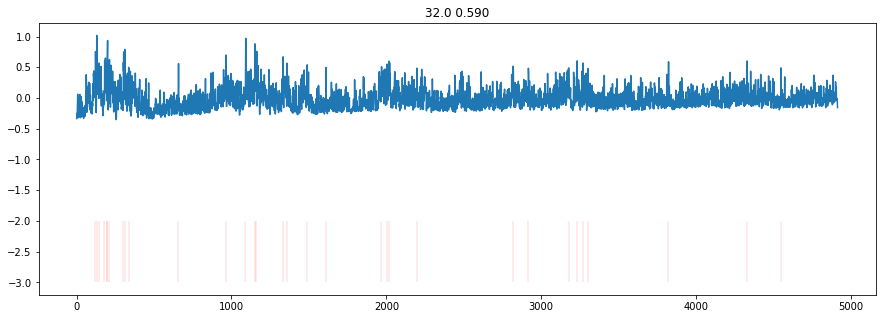

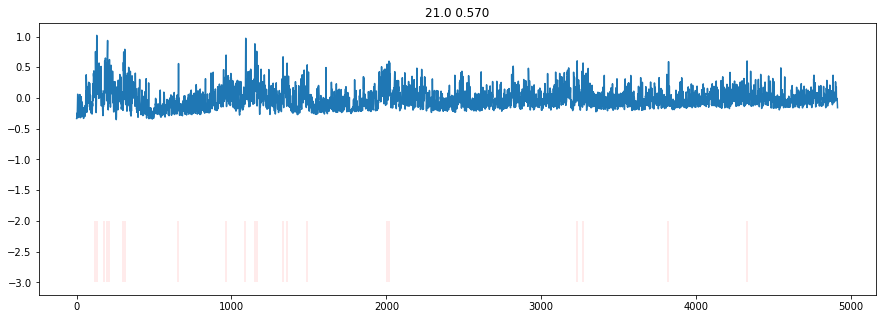

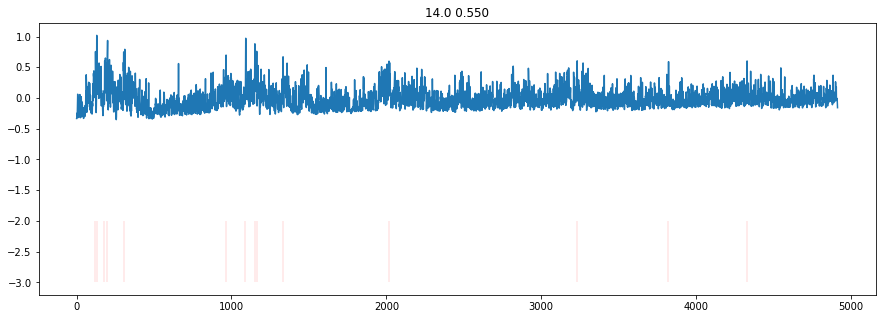

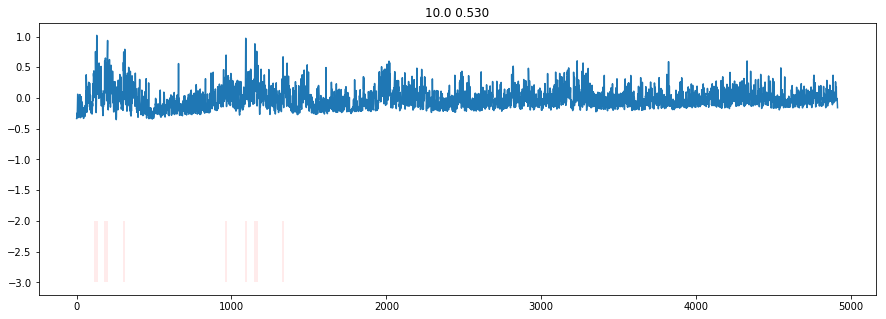

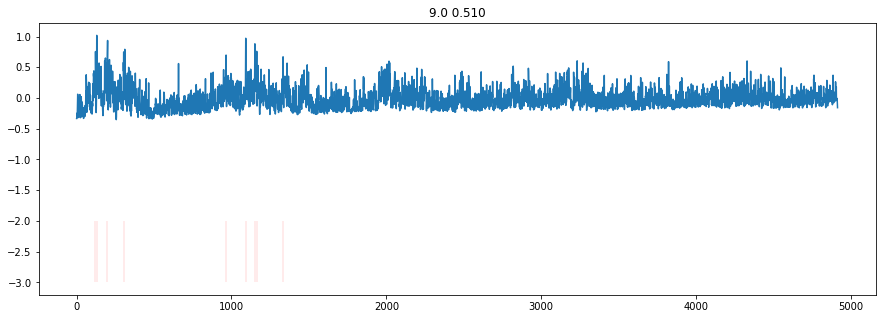

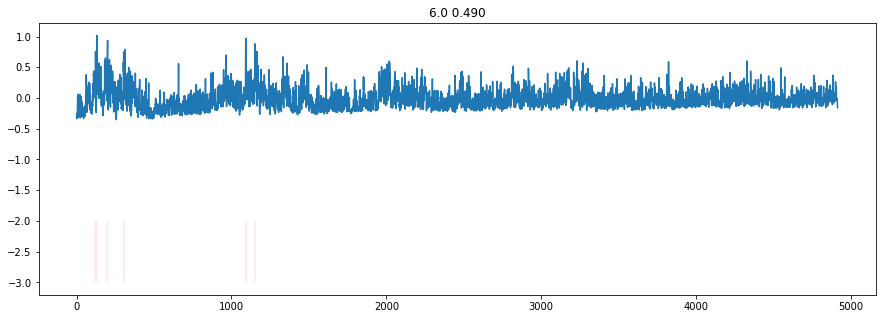

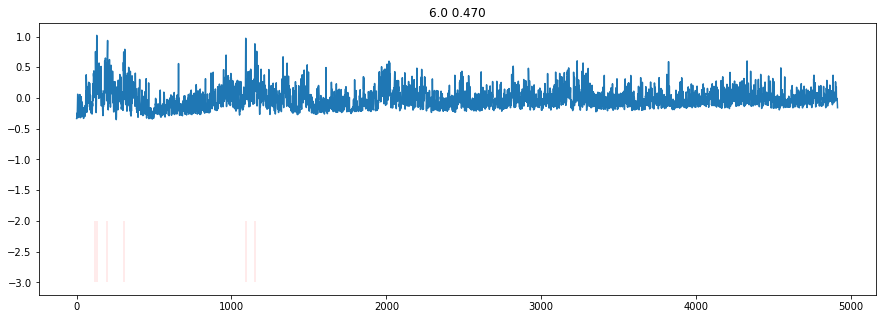

In [4]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
c = 243

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.690binarised.npy'))
callist = sorted(glob.glob('*BLN*0.690modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.690'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.670binarised.npy'))
callist = sorted(glob.glob('*BLN*0.670modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.670'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.650binarised.npy'))
callist = sorted(glob.glob('*BLN*0.650modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.650'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.630binarised.npy'))
callist = sorted(glob.glob('*BLN*0.630modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.630'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.610binarised.npy'))
callist = sorted(glob.glob('*BLN*0.610modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.610'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.590binarised.npy'))
callist = sorted(glob.glob('*BLN*0.590modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.590'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.570binarised.npy'))
callist = sorted(glob.glob('*BLN*0.570modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.570'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.550binarised.npy'))
callist = sorted(glob.glob('*BLN*0.550modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.550'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.530binarised.npy'))
callist = sorted(glob.glob('*BLN*0.530modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.530'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.510binarised.npy'))
callist = sorted(glob.glob('*BLN*0.510modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.510'))
plt.show()



os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.490binarised.npy'))
callist = sorted(glob.glob('*BLN*0.490modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.490'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.470binarised.npy'))
callist = sorted(glob.glob('*BLN*0.470modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.470'))
plt.show()

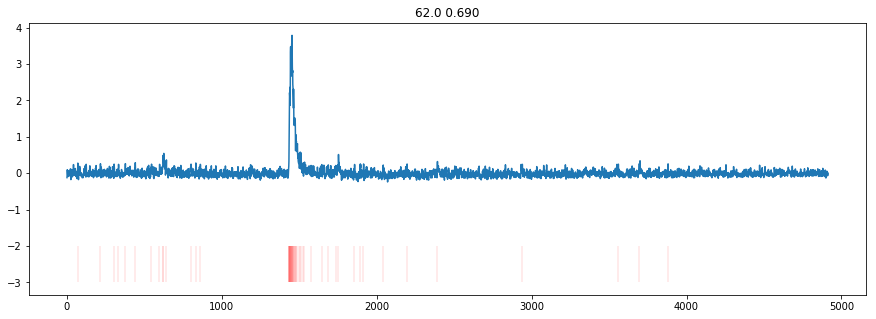

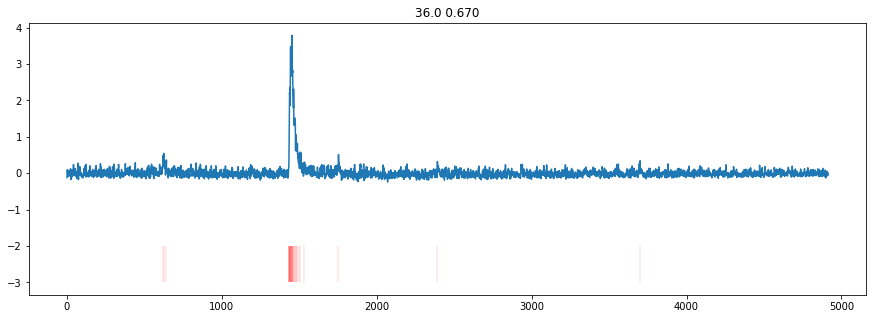

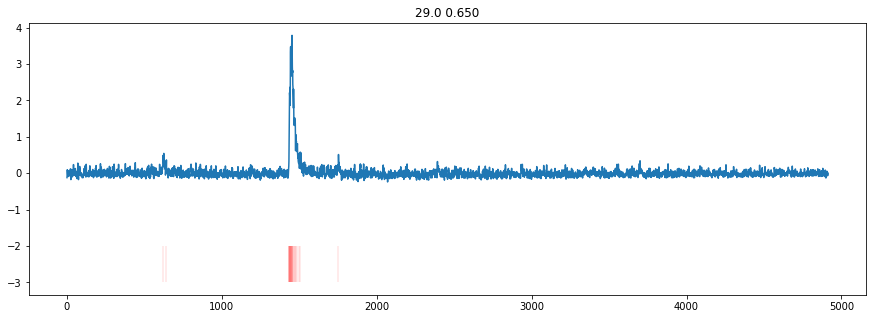

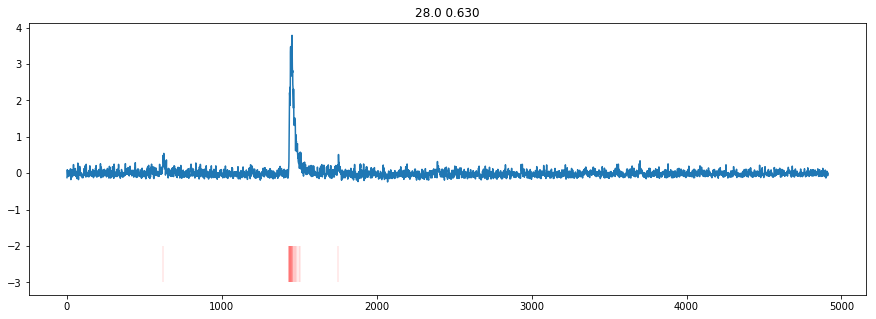

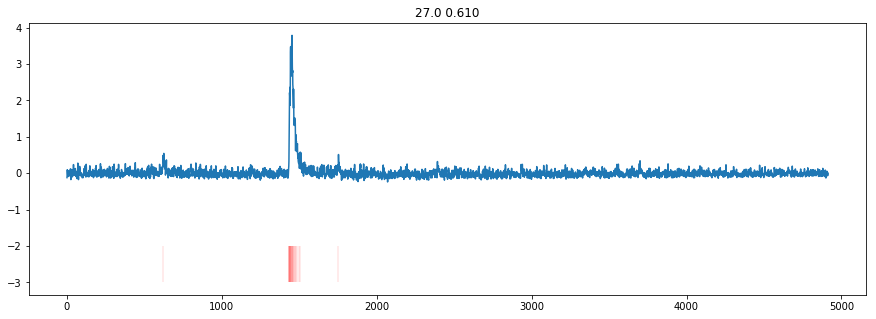

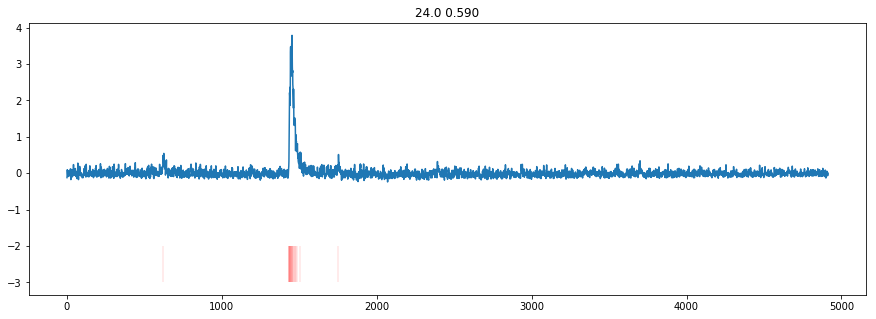

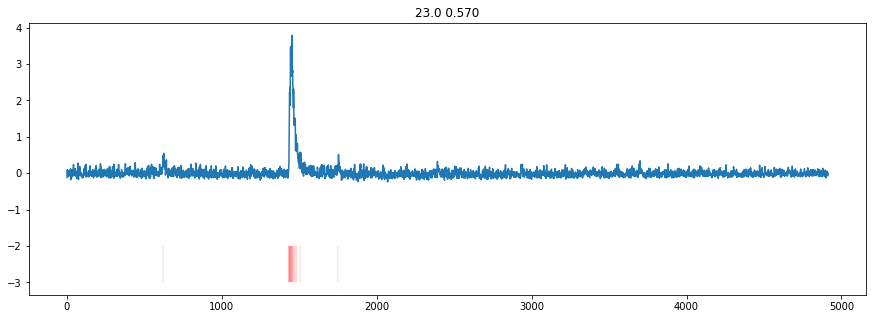

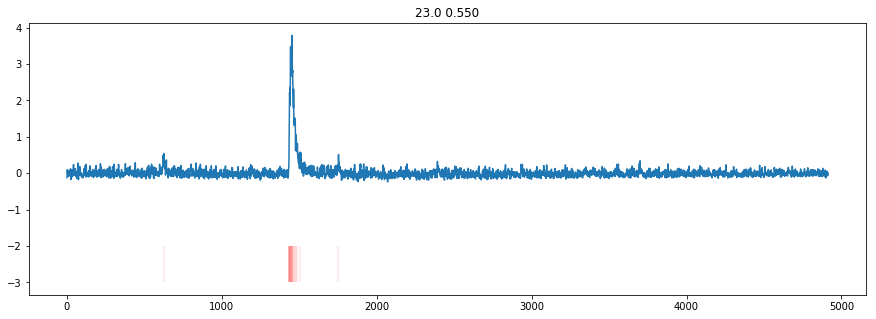

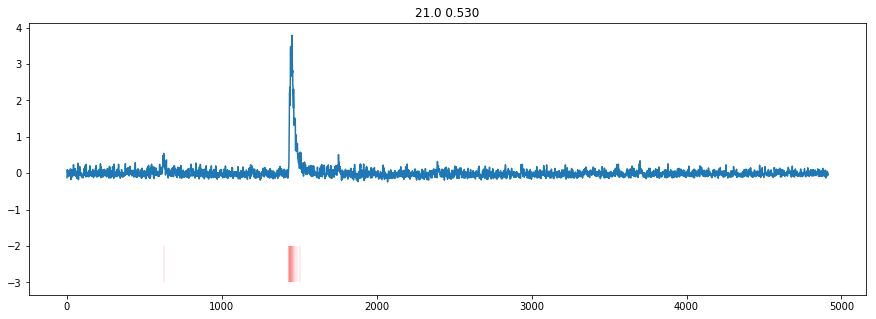

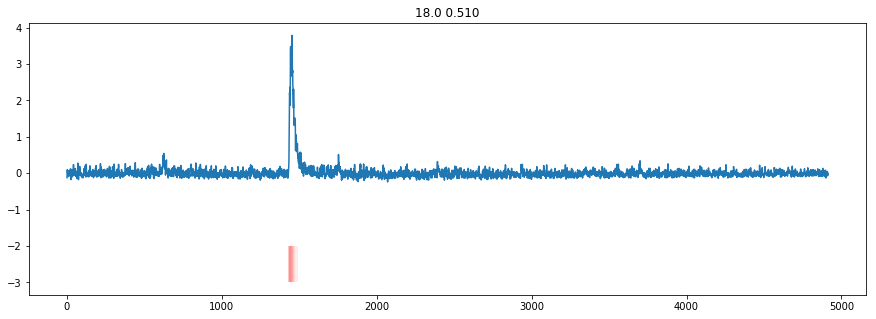

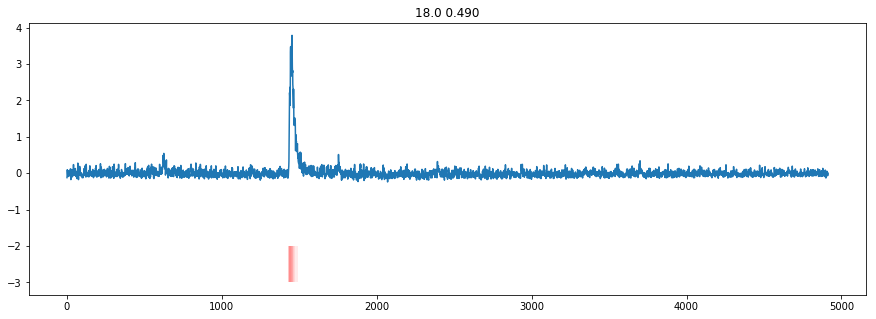

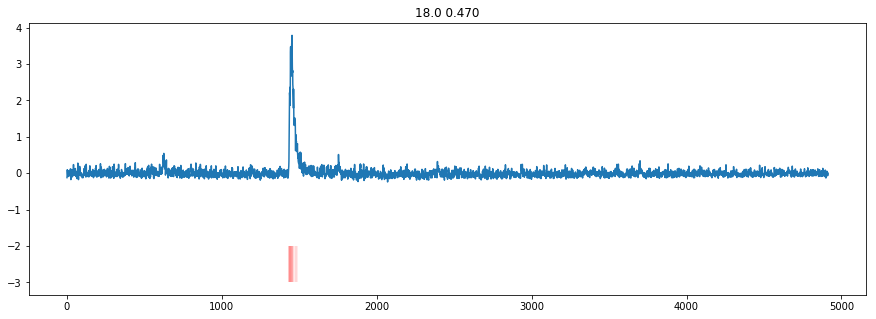

In [5]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
c = 3

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.690binarised.npy'))
callist = sorted(glob.glob('*BLN*0.690modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.690'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.670binarised.npy'))
callist = sorted(glob.glob('*BLN*0.670modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.670'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.650binarised.npy'))
callist = sorted(glob.glob('*BLN*0.650modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.650'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.630binarised.npy'))
callist = sorted(glob.glob('*BLN*0.630modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.630'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.610binarised.npy'))
callist = sorted(glob.glob('*BLN*0.610modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.610'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.590binarised.npy'))
callist = sorted(glob.glob('*BLN*0.590modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.590'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.570binarised.npy'))
callist = sorted(glob.glob('*BLN*0.570modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.570'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.550binarised.npy'))
callist = sorted(glob.glob('*BLN*0.550modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.550'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.530binarised.npy'))
callist = sorted(glob.glob('*BLN*0.530modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.530'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.510binarised.npy'))
callist = sorted(glob.glob('*BLN*0.510modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.510'))
plt.show()



os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.490binarised.npy'))
callist = sorted(glob.glob('*BLN*0.490modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.490'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.470binarised.npy'))
callist = sorted(glob.glob('*BLN*0.470modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.470'))
plt.show()

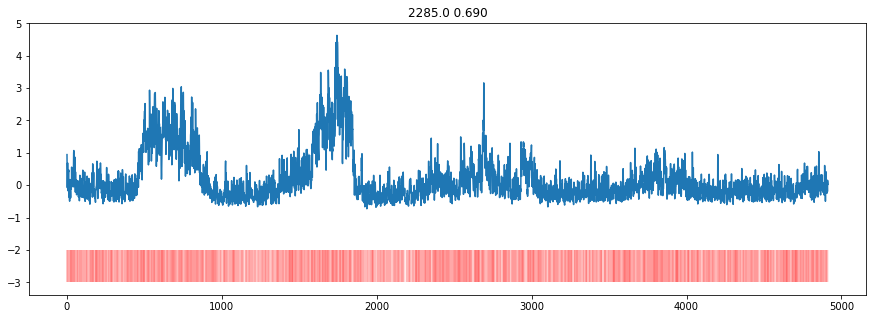

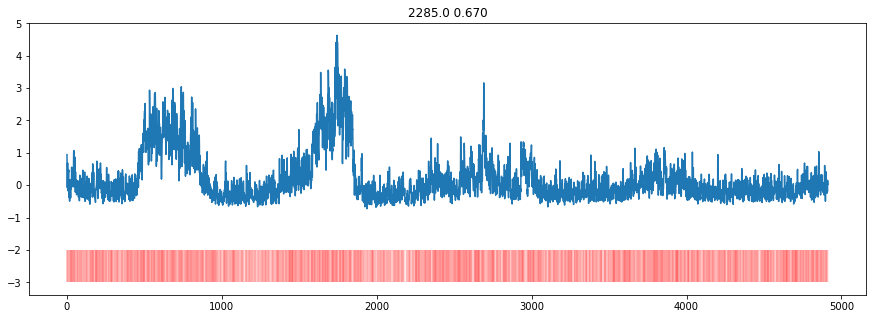

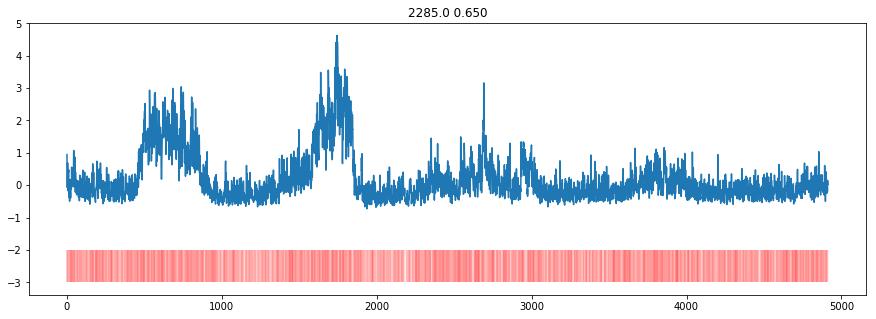

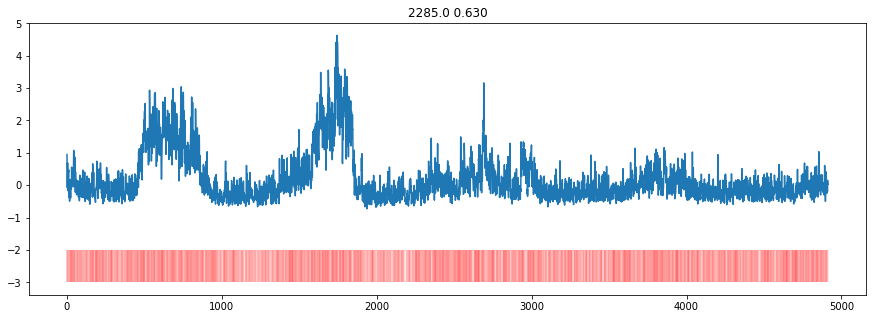

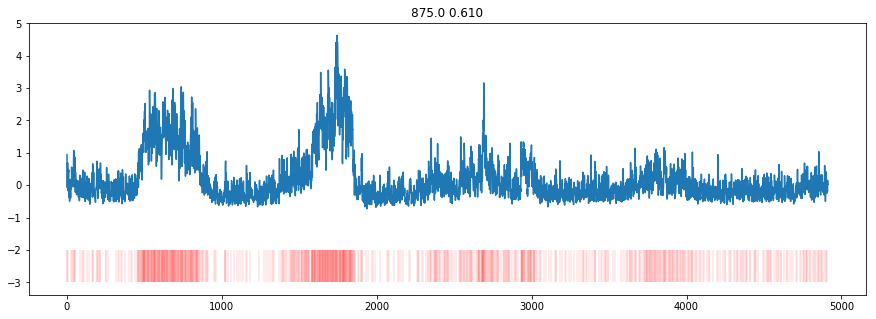

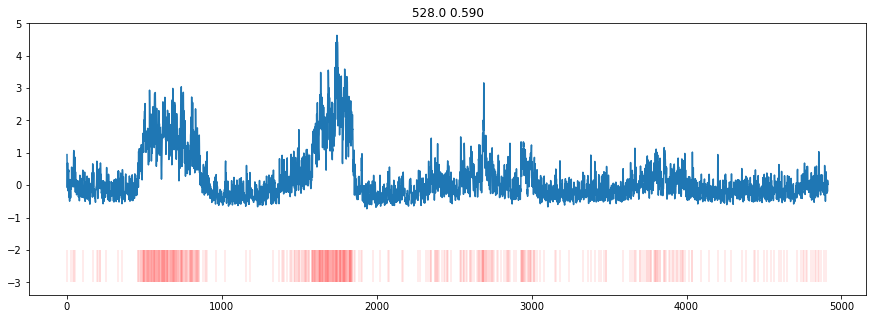

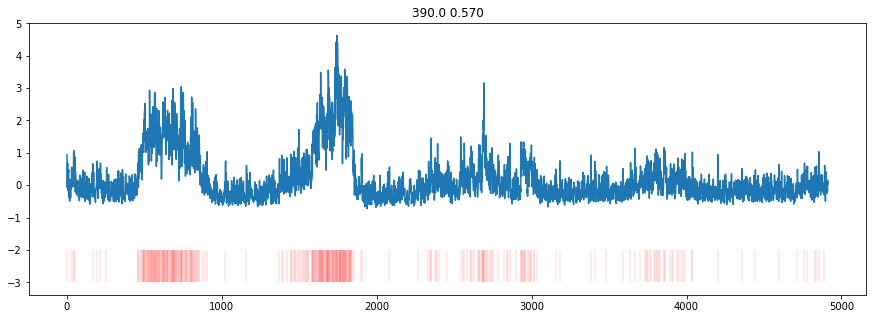

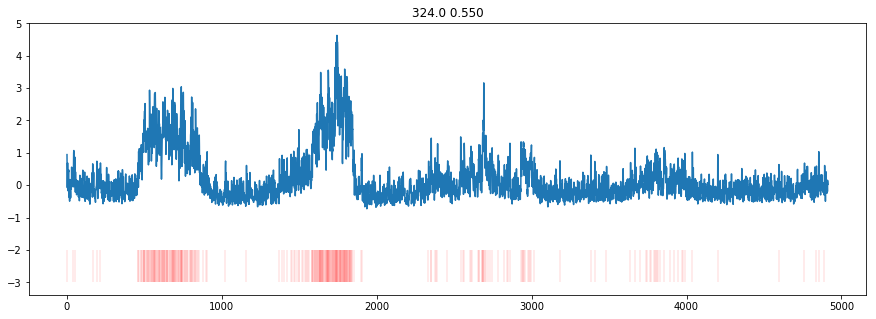

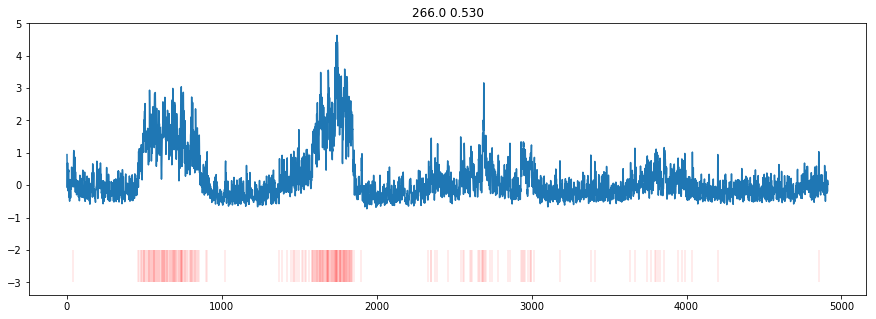

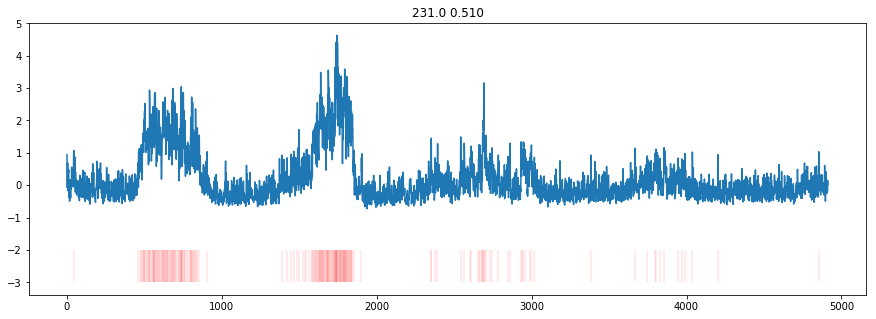

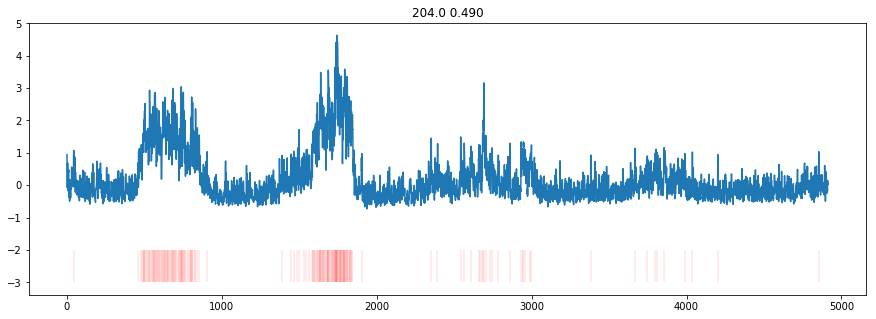

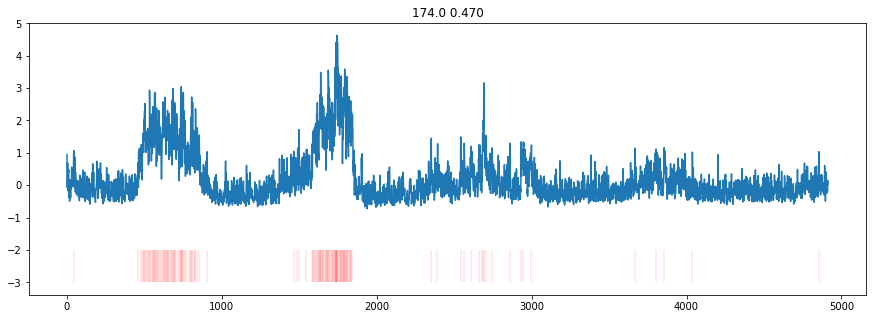

In [6]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
c = 16

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.690binarised.npy'))
callist = sorted(glob.glob('*BLN*0.690modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.690'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.670binarised.npy'))
callist = sorted(glob.glob('*BLN*0.670modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.670'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.650binarised.npy'))
callist = sorted(glob.glob('*BLN*0.650modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.650'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.630binarised.npy'))
callist = sorted(glob.glob('*BLN*0.630modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.630'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.610binarised.npy'))
callist = sorted(glob.glob('*BLN*0.610modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.610'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.590binarised.npy'))
callist = sorted(glob.glob('*BLN*0.590modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.590'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.570binarised.npy'))
callist = sorted(glob.glob('*BLN*0.570modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.570'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.550binarised.npy'))
callist = sorted(glob.glob('*BLN*0.550modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.550'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.530binarised.npy'))
callist = sorted(glob.glob('*BLN*0.530modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.530'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.510binarised.npy'))
callist = sorted(glob.glob('*BLN*0.510modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.510'))
plt.show()



os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.490binarised.npy'))
callist = sorted(glob.glob('*BLN*0.490modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.490'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.470binarised.npy'))
callist = sorted(glob.glob('*BLN*0.470modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.470'))
plt.show()

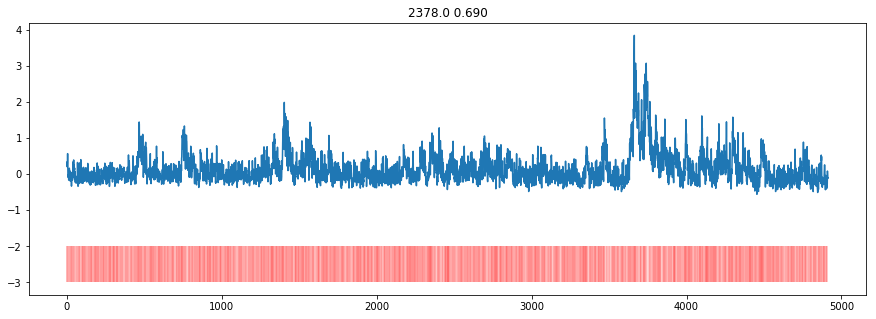

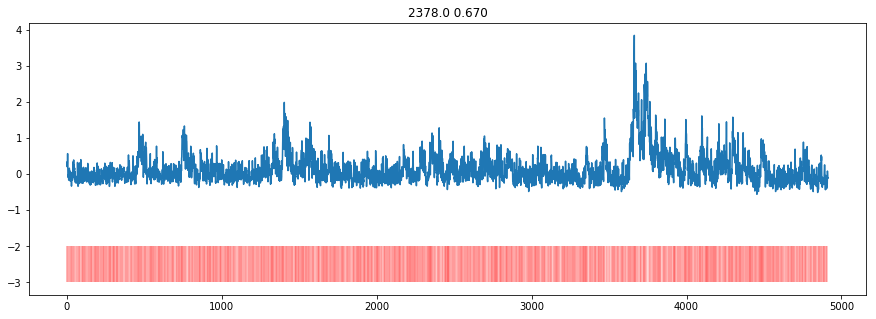

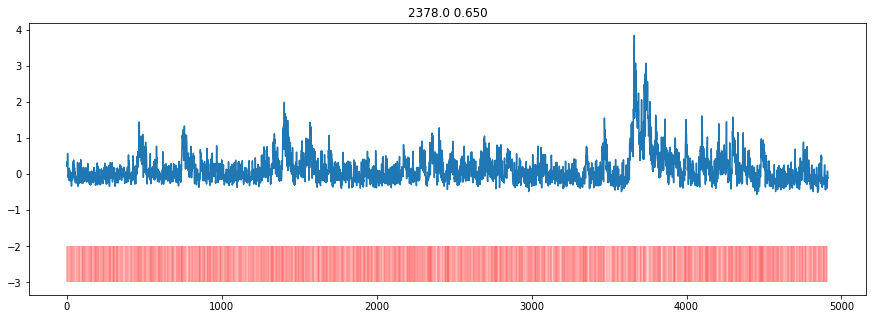

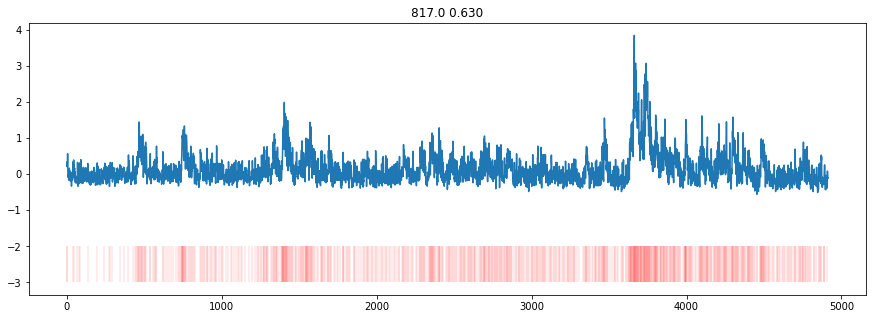

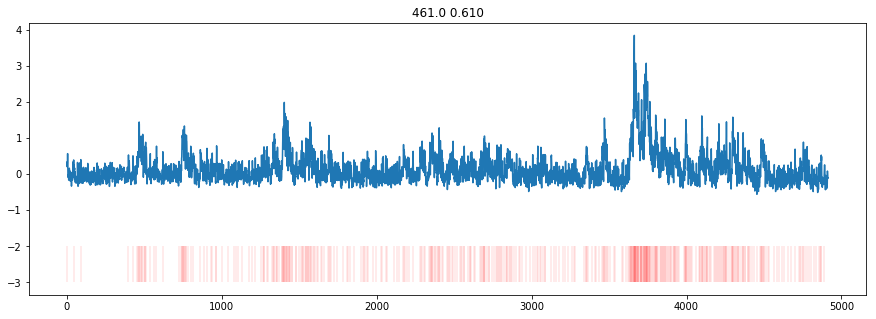

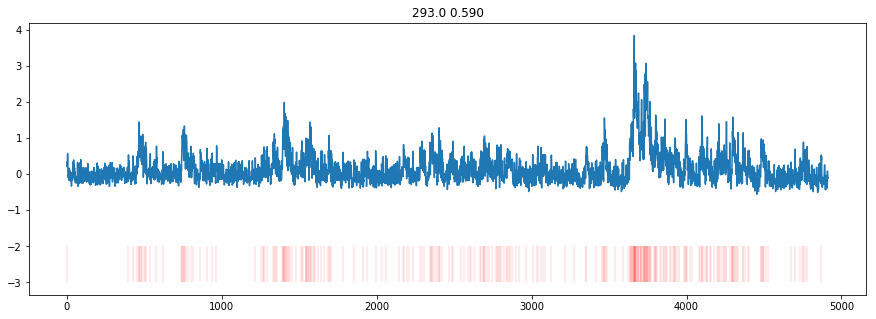

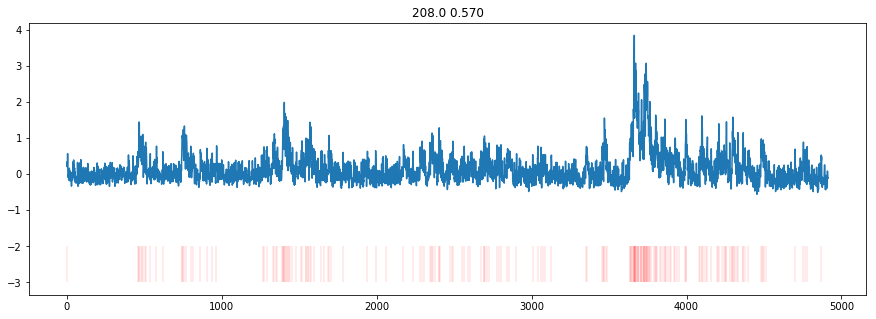

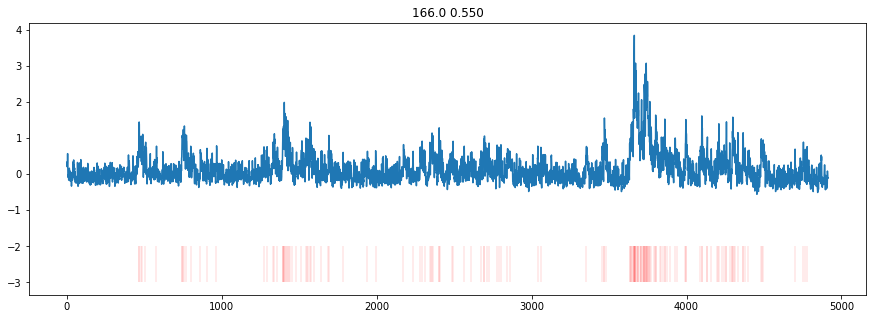

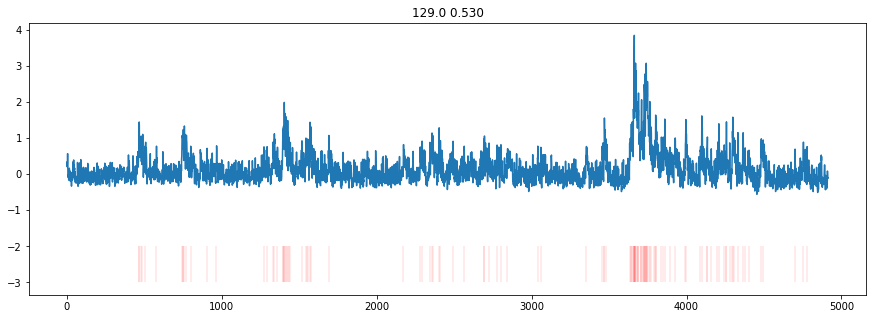

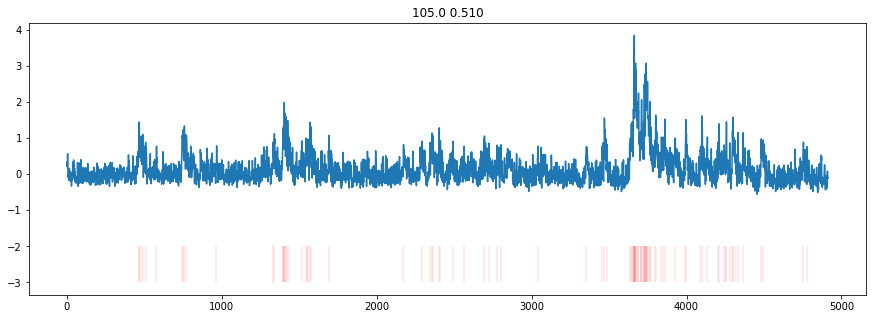

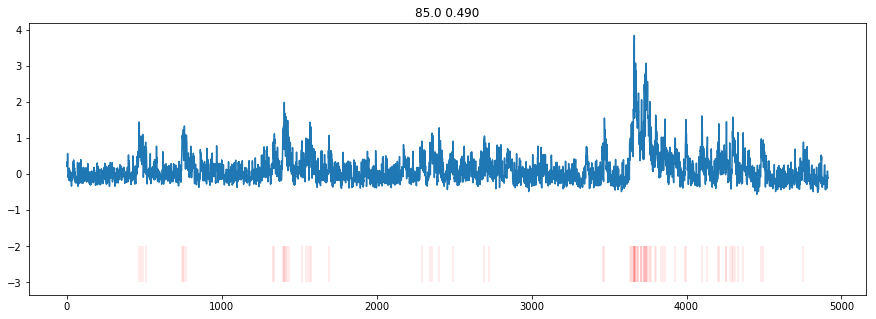

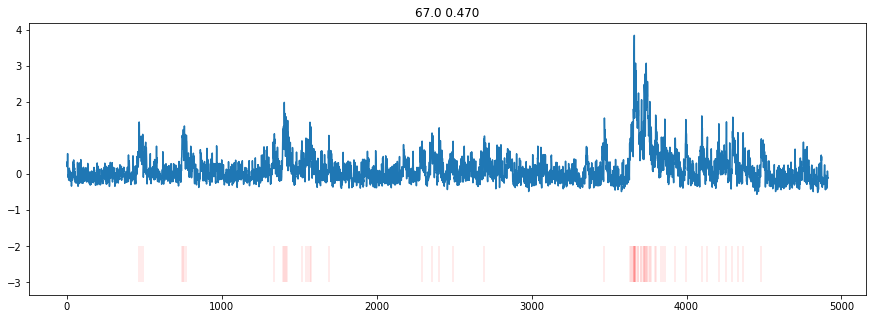

In [7]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
c = 81

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.690binarised.npy'))
callist = sorted(glob.glob('*BLN*0.690modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.690'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.670binarised.npy'))
callist = sorted(glob.glob('*BLN*0.670modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.670'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.650binarised.npy'))
callist = sorted(glob.glob('*BLN*0.650modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.650'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.630binarised.npy'))
callist = sorted(glob.glob('*BLN*0.630modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.630'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.610binarised.npy'))
callist = sorted(glob.glob('*BLN*0.610modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.610'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.590binarised.npy'))
callist = sorted(glob.glob('*BLN*0.590modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.590'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.570binarised.npy'))
callist = sorted(glob.glob('*BLN*0.570modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.570'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.550binarised.npy'))
callist = sorted(glob.glob('*BLN*0.550modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.550'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.530binarised.npy'))
callist = sorted(glob.glob('*BLN*0.530modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.530'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.510binarised.npy'))
callist = sorted(glob.glob('*BLN*0.510modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.510'))
plt.show()



os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.490binarised.npy'))
callist = sorted(glob.glob('*BLN*0.490modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.490'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.470binarised.npy'))
callist = sorted(glob.glob('*BLN*0.470modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.470'))
plt.show()

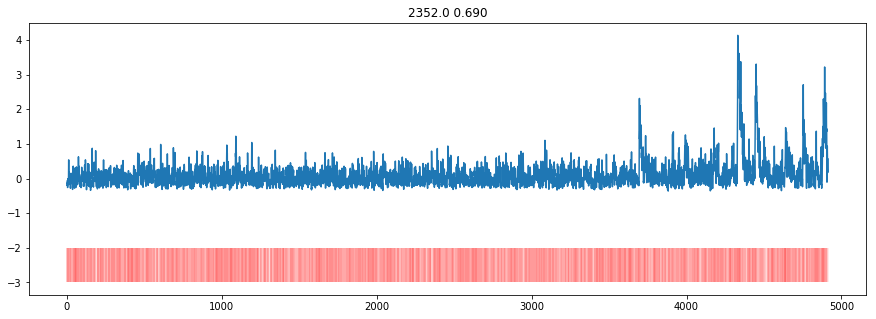

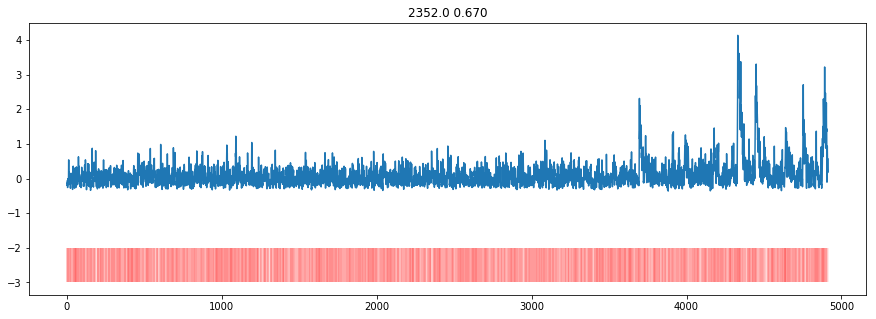

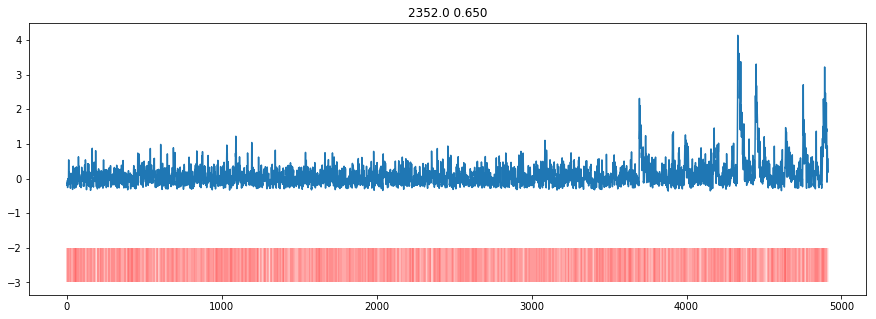

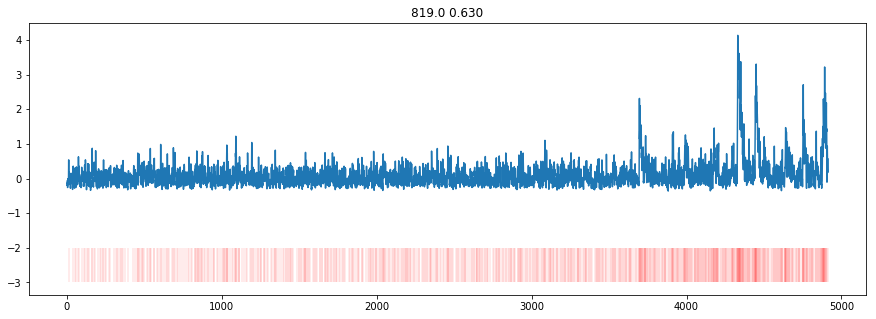

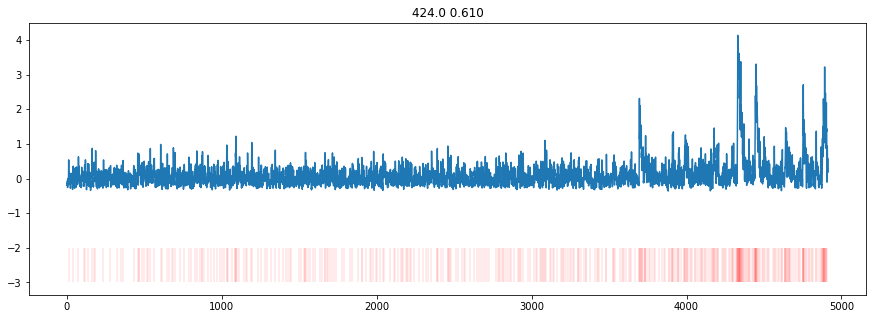

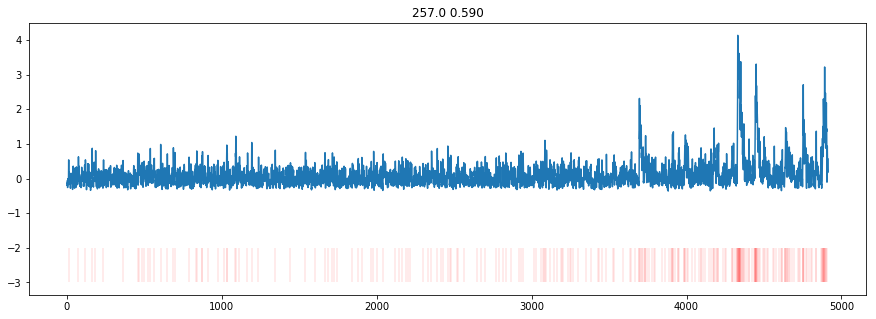

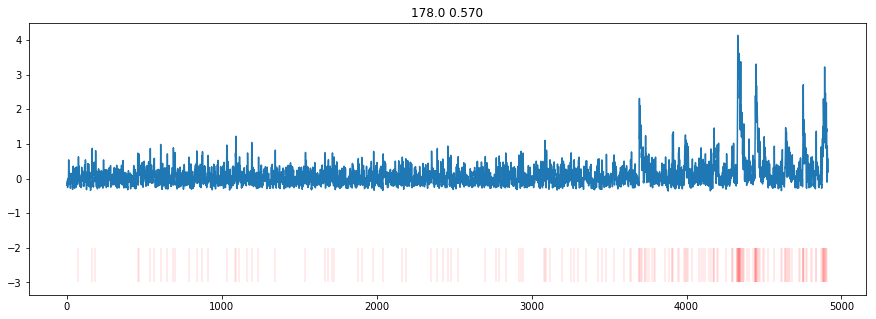

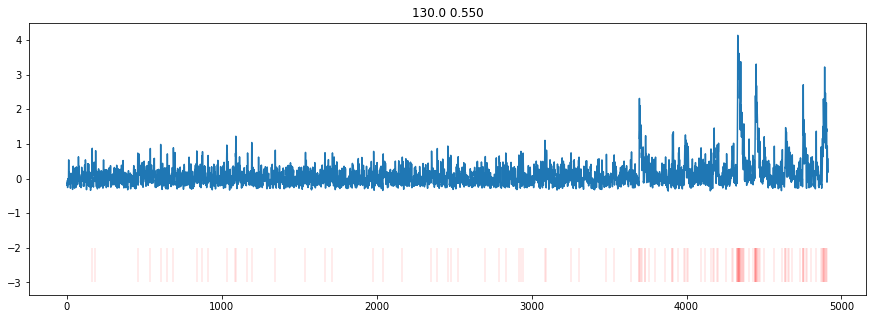

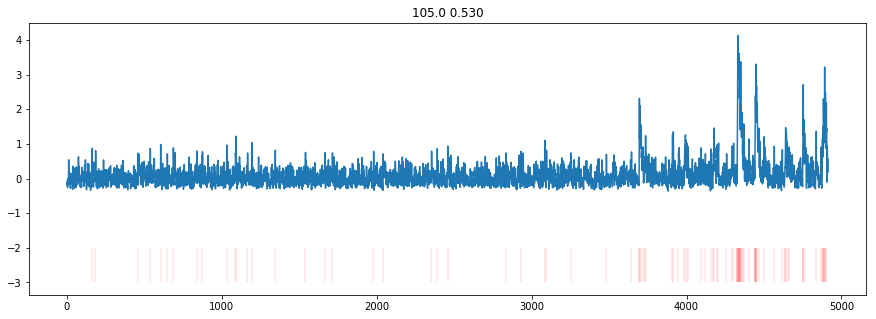

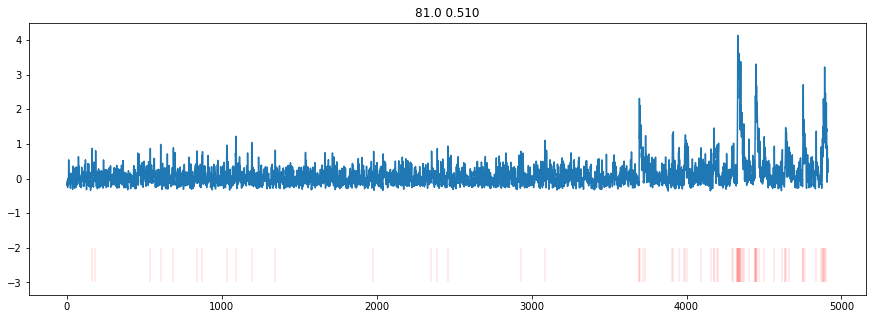

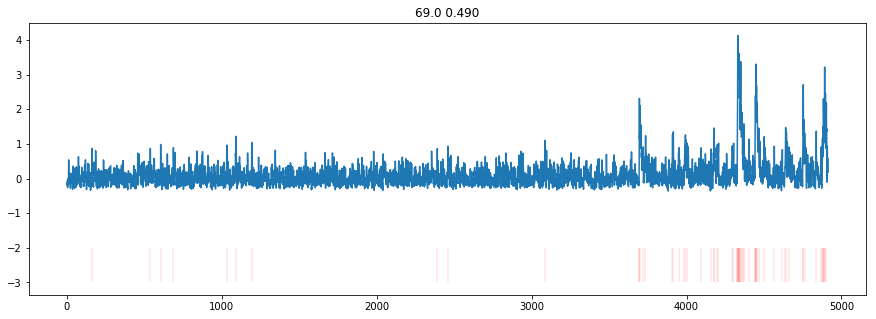

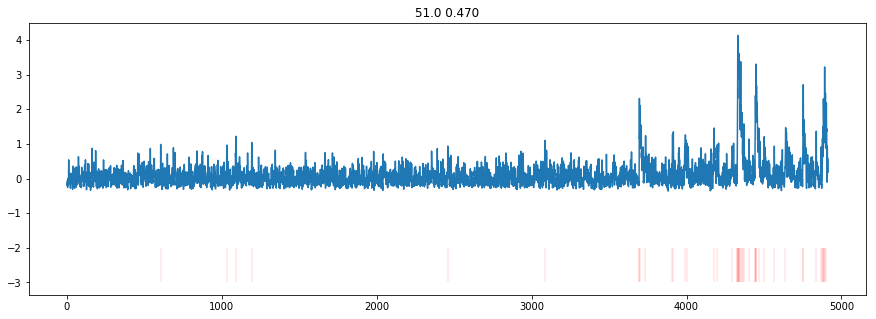

In [8]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
c = 170

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.690binarised.npy'))
callist = sorted(glob.glob('*BLN*0.690modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.690'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.670binarised.npy'))
callist = sorted(glob.glob('*BLN*0.670modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.670'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.650binarised.npy'))
callist = sorted(glob.glob('*BLN*0.650modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.650'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.630binarised.npy'))
callist = sorted(glob.glob('*BLN*0.630modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.630'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.610binarised.npy'))
callist = sorted(glob.glob('*BLN*0.610modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.610'))

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.590binarised.npy'))
callist = sorted(glob.glob('*BLN*0.590modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.590'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.570binarised.npy'))
callist = sorted(glob.glob('*BLN*0.570modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.570'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.550binarised.npy'))
callist = sorted(glob.glob('*BLN*0.550modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.550'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.530binarised.npy'))
callist = sorted(glob.glob('*BLN*0.530modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.530'))
plt.show()


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.510binarised.npy'))
callist = sorted(glob.glob('*BLN*0.510modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.510'))
plt.show()



os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.490binarised.npy'))
callist = sorted(glob.glob('*BLN*0.490modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.490'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.470binarised.npy'))
callist = sorted(glob.glob('*BLN*0.470modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.470'))
plt.show()